In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
# Ставим более старую версию sklearn, чтобы была совместимость с ELI5
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.0.2

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 44.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import sklearn
sklearn.__version__


'1.2.2'

In [ ]:
# используется для разбиения на предложения
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Загрузка train предобработанного Никитой (Natasha)

In [ ]:
data = pd.read_excel("clean_dataset_3_credit_ratings_agencies_TRAIN.xls")

In [ ]:
data.columns

Index(['Id', 'pr_txt', 'Категория', 'Уровень рейтинга', 'pr_txt_cleaned',
       'sentences_cleaned', 'sentences_splitted', 'cleaned_pr_bw'],
      dtype='object')

In [ ]:
data_test = pd.read_excel("clean_dataset_3_credit_ratings_agencies_VALID.xls")

In [ ]:
data["sentences_splitted"] = data["sentences_cleaned"].apply(nltk.sent_tokenize)
data_test["sentences_splitted"] = data_test["sentences_cleaned"].apply(nltk.sent_tokenize)

In [ ]:
def sentences_to_words(data):
  data["cleaned_pr_bw"] = np.nan # хранит пресс релиз как набор слов
  for i, pr in data["sentences_splitted"].items():
    pr_no_periods = []
    for sent in pr:
      pr_no_periods.append(sent.strip(" .")) # удаляем точки в конце предложений
    data.loc[i, "cleaned_pr_bw"] = " ".join(pr_no_periods)
    #data.loc[i, "sentences_splitted"] = pr_no_periods

In [ ]:
sentences_to_words(data)
sentences_to_words(data_test)

In [ ]:
data.head()

Id                                             pr_txt Категория  \
0   2  «Эксперт РА» подтвердил кредитный рейтинг комп...        BB   
1   4  «Эксперт РА» присвоил кредитный рейтинг ПАО «Ф...       AAA   
2   7  «Эксперт РА» повысил кредитный рейтинг ОАО «МР...        AA   
3   8  «Эксперт РА» понизил кредитный рейтинг ПАО «М....         A   
4   9  «Эксперт РА» повысил кредитный рейтинг компани...        BB   

  Уровень рейтинга                                     pr_txt_cleaned  \
0               BB  «Эксперт РА» подтвердил кредитный рейтинг комп...   
1              AAA  «Эксперт РА» присвоил кредитный рейтинг ПАО «Ф...   
2              AA+  «Эксперт РА» повысил кредитный рейтинг ОАО «МР...   
3                A  «Эксперт РА» понизил кредитный рейтинг ПАО «М....   
4              BB+  «Эксперт РА» повысил кредитный рейтинг компани...   

                                   sentences_cleaned  \
0  подтвердить кредитный рейтинг компания уровень...   
1  присвоить кредитный рейтинг уровень март рейти...   
2  повысить кредитный рейтинг уровень март рейтин...   
3  понизить кредитный рейтинг уровень изменить пр...   
4  повысить кредитный рейтинг компания уровень из...   

                                  sentences_splitted  \
0  [подтвердить кредитный рейтинг компания уровен...   
1  [присвоить кредитный рейтинг уровень март рейт...   
2  [повысить кредитный рейтинг уровень март рейти...   
3  [понизить кредитный рейтинг уровень изменить п...   
4  [повысить кредитный рейтинг компания уровень и...   

                                       cleaned_pr_bw  
0  подтвердить кредитный рейтинг компания уровень...  
1  присвоить кредитный рейтинг уровень март рейти...  
2  повысить кредитный рейтинг уровень март рейтин...  
3  понизить кредитный рейтинг уровень изменить пр...  
4  повысить кредитный рейтинг компания уровень из...

In [ ]:
data_test.head()

Id                                             pr_txt Категория  \
0   2  «Эксперт РА» подтвердил кредитный рейтинг комп...        BB   
1   7  «Эксперт РА» повысил кредитный рейтинг ОАО «МР...        AA   
2   9  «Эксперт РА» повысил кредитный рейтинг компани...        BB   
3  12  «Эксперт РА» присвоил кредитный рейтинг АО «Но...         A   
4  65  «Эксперт РА» подтвердил кредитный рейтинг Russ...         A   

  Уровень рейтинга                                     pr_txt_cleaned  \
0               BB  «Эксперт РА» подтвердил кредитный рейтинг комп...   
1              AA+  «Эксперт РА» повысил кредитный рейтинг ОАО «МР...   
2              BB+  «Эксперт РА» повысил кредитный рейтинг компани...   
3                A  «Эксперт РА» присвоил кредитный рейтинг АО «Но...   
4               A+  «Эксперт РА» подтвердил кредитный рейтинг Russ...   

                                   sentences_cleaned  \
0  подтвердить кредитный рейтинг компания уровень...   
1  повысить кредитный рейтинг уровень март рейтин...   
2  повысить кредитный рейтинг компания уровень из...   
3  присвоить кредитный рейтинг уровень март рейти...   
4  подтвердить кредитный рейтинг уровень установи...   

                                  sentences_splitted  \
0  [подтвердить кредитный рейтинг компания уровен...   
1  [повысить кредитный рейтинг уровень март рейти...   
2  [повысить кредитный рейтинг компания уровень и...   
3  [присвоить кредитный рейтинг уровень март рейт...   
4  [подтвердить кредитный рейтинг уровень установ...   

                                       cleaned_pr_bw  
0  подтвердить кредитный рейтинг компания уровень...  
1  повысить кредитный рейтинг уровень март рейтин...  
2  повысить кредитный рейтинг компания уровень из...  
3  присвоить кредитный рейтинг уровень март рейти...  
4  подтвердить кредитный рейтинг уровень установи...

In [ ]:
# уберём дубликаты из теста
id_in_test = data_test["Id"].to_list()

In [ ]:
data = data[~data["Id"].isin(id_in_test)] # убираем дубликаты

# Загрузка исходного train

In [ ]:
data_orig = pd.read_excel("CRA_train_1200.xlsx", index_col= 0)

In [ ]:
data.sample(3)

pr_txt Категория  \
Id                                                                 
545  Кредитный рейтинг  Государственной корпорации ...       AAA   
683  «Эксперт РА» подтвердил рейтинг компании ФГУП ...       AAA   
282  Эксперт РА» подтвердил кредитный рейтинг\nПАО ...        AA   

    Уровень рейтинга  
Id                    
545              AAA  
683              AAA  
282              AA+

In [ ]:
# random press-release
data.loc[np.random.randint(0, len(data)),"pr_txt"]

'«Эксперт РА» подтвердил рейтинг компании «Башнефть» на уровне <rating>     Москва, 11 июня 2021 г.   Рейтинговое агентство «Эксперт РА» подтвердило  рейтинг кредитоспособности  нефинансовой компании   «Башнефть»   на уровне <rating>. Прогноз по рейтингу – стабильный.  ")   ПАО АНК «Башнефть» (далее – Компания) – крупный вертикально интегрированный холдинг в российской нефтегазовой отрасли, контролирующим акционером которого является ПАО «НК «Роснефть» (<rating>, стаб., далее – Группа). По итогам 2020 года объем добычи жидких углеводородов Компании составил 95,9 млн баррелей. На Уфимской группе НПЗ Компании было переработано 15,5 млн тонн нефти с выходом светлых нефтепродуктов в 65,7%.     Агентство отмечает, что уровень кредитоспособности Компании во многом определяется соответствующим уровнем кредитоспособности Группы по причине значительной степени их операционной интеграции. Она проявляется как в части реализации нефти и нефтепродуктов, так и в части оптимизации затрат на нефтесерв

# Посмотрим на таргеты

In [ ]:
data.columns

Index(['pr_txt', 'Категория', 'Уровень рейтинга'], dtype='object')

In [ ]:
data["Категория"].sort_values().unique()

array(['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'C'], dtype=object)

In [ ]:
data["Уровень рейтинга"].sort_values().unique()

array(['A', 'A+', 'A-', 'AA', 'AA+', 'AA-', 'AAA', 'B', 'B+', 'B-', 'BB',
       'BB+', 'BB-', 'BBB', 'BBB+', 'BBB-', 'C'], dtype=object)

Text(0.5, 1.0, 'Сравнение меннее и более подробного рейтинга')

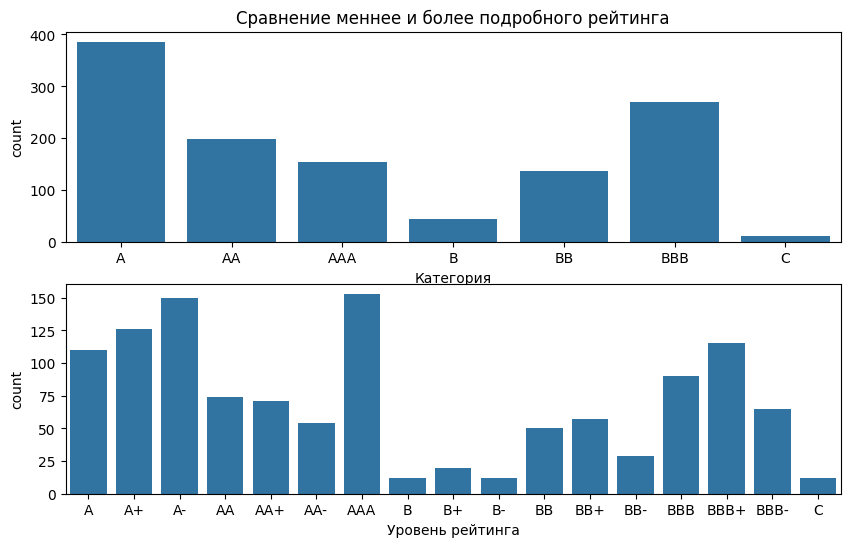

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_size_inches(10, 6)
sns.countplot(data = data, x = "Категория", order = data["Категория"].sort_values().unique(), ax = ax1)
sns.countplot(data = data, x = "Уровень рейтинга", order = data["Уровень рейтинга"].sort_values().unique(), ax = ax2)
ax1.set_title("Сравнение меннее и более подробного рейтинга")

Можно сделать вывод что "середнячков" больше всего: A, BBB

# Введём новый таргет ещё более укрупнив менее подробный рейтинг: low, middle, high. Также введём бинарный таргет low/high для упрощённых тестов

In [ ]:
high = ["AAA", "AA"] # высокий уровень кредитоспособности
middle = ["A", "BBB"] # средний уровень кредитоспособности
low = ["BB", "B", "C"] # низкий уровень кредитоспособности

def gen_new_feature3(val):
    """
    Создаёт новый таргет из 3 классов
    """
    new = ""
    if val in high:
      new = "high"
    elif val in middle:
      new = "middle"
    elif val in low:
      new = "low"

    return new

In [ ]:
low

['BB', 'B', 'C']

In [ ]:
def gen_new_feature2(val):
    """
    Создаёт новый бинарный таргет
    """
    new = ""
    if val in high + middle:
      new = "good"
    else:
      new = "bad"
    return new

In [ ]:
data["Category3"] = data["Категория"].apply(gen_new_feature3)

data["Category2"] = data["Категория"].apply(gen_new_feature2)

Text(0.5, 1.0, 'Новые укрупнённые таргеты')

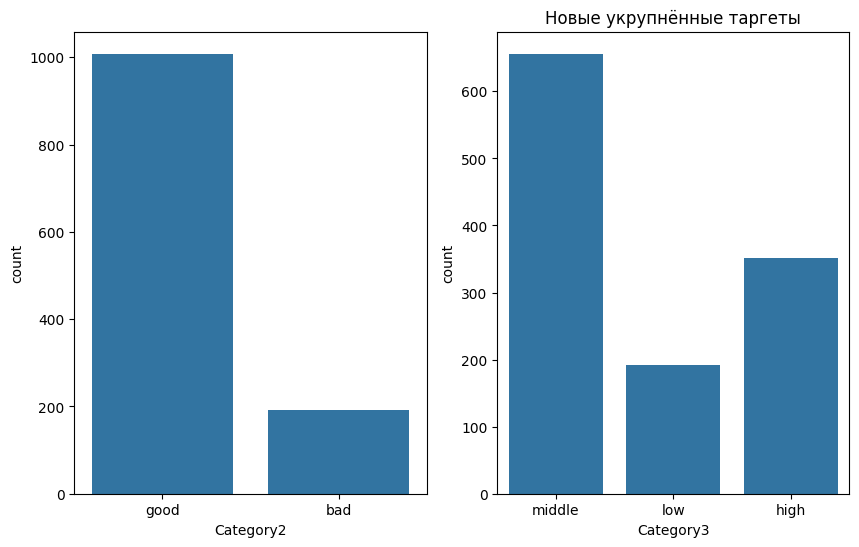

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 6)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(data = data, x = "Category2", ax = ax1)
sns.countplot(data = data, x = "Category3", ax = ax2)
plt.title("Новые укрупнённые таргеты")

Видно, что середнячков больше всего, как и ожидалось

#Нулевая гипотеза: числовые данные (даты, суммы и т.п.), веб-сайты не важны и/или сложны для интерпретацией моделью - почистим данные. Избавимся также от stopwords, знаков препинания и всё переведём в нижний регистр. Также предожений довольно много в пресс-релизе и достаточно много коротких формальных предложений - будем считать что основная информация может быть оценена на уровне предлождений, а не на уровне слов. Будем смотреть дял начала, как наш аггрегированный таргет Category объясняется данными

##Чистим данные

In [ ]:
import re
def sentence_cleaner(text):
  # delete URLS
  pattern = r'http[s]?://\S+'
  text = re.sub(pattern, '', text)

  # Очистка текста
  text = re.sub(r'[^\w\s]+', '', text)  # Удаление всех символов, которые не являются буквами, цифрами или пробелами
  text = re.sub(r'\b\w{1,2}\b', '', text)  # Удаление слов, состоящих из 1-2 букв
  text = re.sub(r'\b(lol|omg|wtf)\b', '', text)  # Удаление сленговых слов
  text = re.sub(r'\b[A-Z]{2,}\b', '', text)  # Удаление аббревиатур, состоящих из 2 или более букв
  text = re.sub(r'(:\w+:)', '', text)  # Удаление эмодзи
  text = re.sub(r'\d+', '', text)  # Удаление цифр
  text = re.sub(r'\b(Inc|Ltd|Co|Corp|LLC|PLC|AG|GmbH|SA|NV)\b', '', text)  # Удаляем компании
  text = re.sub(r'\s+', ' ', text) # удаление лишних пробелов
  text = text.lower()
  return text

def paragraph_cleaner(sentences : list):
  return [sentence_cleaner(sent) for sent in sentences]

In [ ]:
# тестируем функцию
noisy_sent = "Компания; https://en.wikipedia.org/wiki/Schutzstaffel ; имеет- долгосрочную %&стратегию до 2025-2024 года, \
 нацеленную на,, расширение парка __ буровых устаНовок и клиентской базы, а_ также на выход 2024 на ;,высокомаржинальные 17% Проекты глубокого < > бурения      скважин в России."
sentence_cleaner(noisy_sent)

'компания имеет долгосрочную стратегию года нацеленную расширение парка буровых установок клиентской базы также выход высокомаржинальные проекты глубокого бурения скважин россии'

## Разделяем на предложения

In [ ]:
data["sentences"] = data["pr_txt"].apply(nltk.sent_tokenize)

In [ ]:
# очищаем предложения и считаем число предложений
sentence_count = []
cleaned_sentences = []
for pr in data["sentences"]:
  sentence_count.append(len(pr))
  cleaned_sentences.append(paragraph_cleaner(pr))



In [ ]:
data["sent_count"] = sentence_count

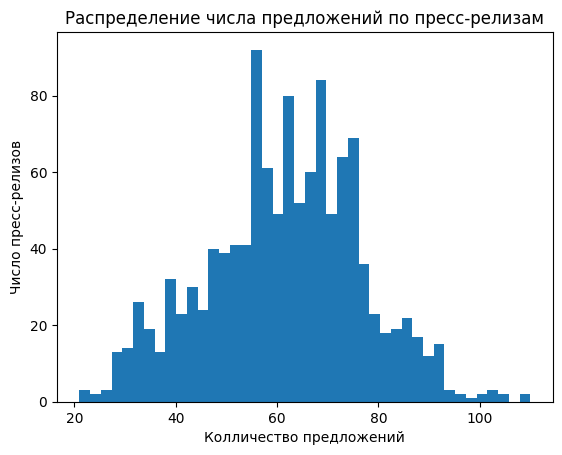

In [ ]:
num_bins = 42
fig, ax = plt.subplots()
plt.hist(sentence_count, bins=num_bins)
plt.xlabel('Колличество предложений')
plt.ylabel('Число пресс-релизов')
plt.title("Распределение числа предложений по пресс-релизам")
plt.show()

<Axes: xlabel='sent_count', ylabel='Count'>

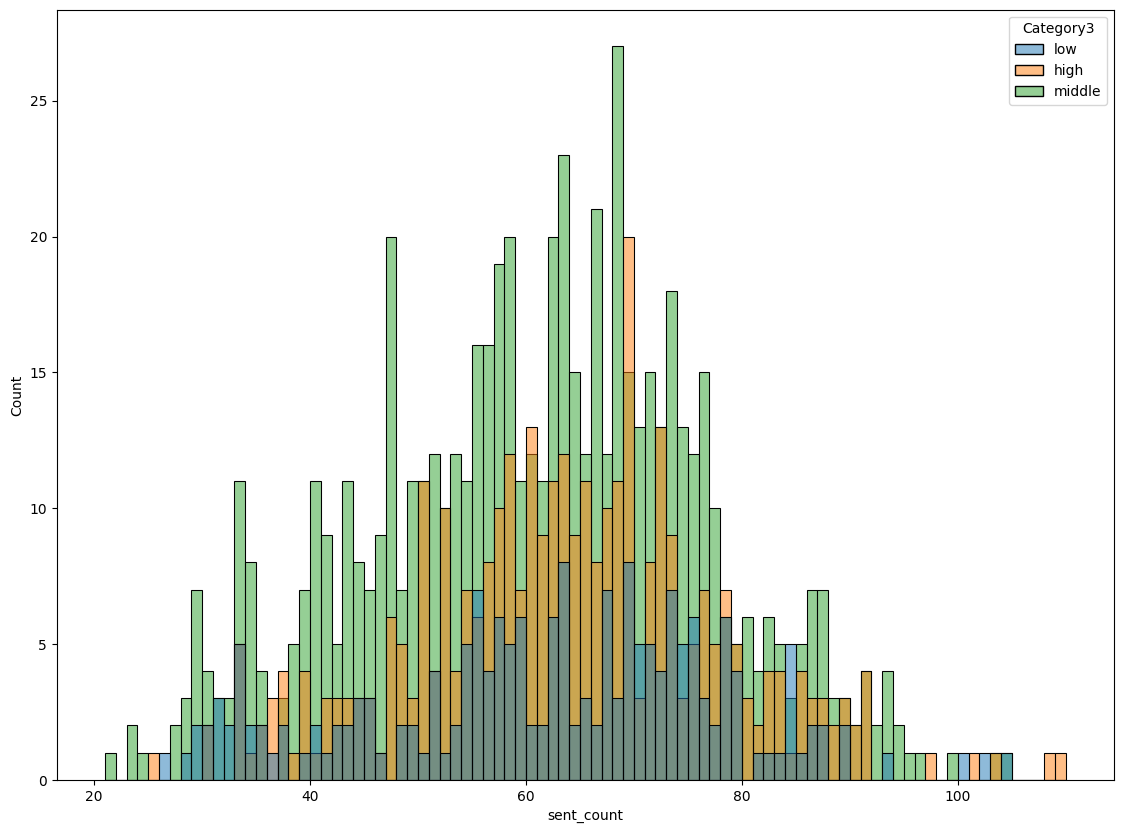

In [ ]:
fig = plt.figure()
fig.set_size_inches(30, 10)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='sent_count', hue='Category3', binwidth=1, ax = plt.gca(), hue_order = ["low", "high", "middle"])

In [ ]:
# data["cleaned_pr"] = ""
# for i, pr in enumerate(cleaned_sentences):
#   data.loc[i+1, "cleaned_pr"] = ". ".join(pr)
# data.loc[np.random.randint(0, len(data)),"cleaned_pr"]

'эксперт подтвердил кредитный рейтинг компании уралкалий уровне rating изменил прогноз стабильный москва мая рейтинговое агентство эксперт подтвердило рейтинг кредитоспособности нефинансовой компании уралкалий уровне rating изменило прогноз рейтингу стабильный . пао уралкалий далее компания является одним крупнейших производителей калия мире. производственные активы компании расположены пермском крае двух близлежащих городах соликамск березники. обладая собственными складскими логистическими трейдинговыми ресурсами компания контролирует практически всю бизнесцепочку добычи калийной руды производства хлористого калия поставок продукции потребителям разных стран. наряду этим рыночная доля компании итогам года составляет около что свидетельствует сильных рыночных конкурентных позициях.  год далее отчетный период уралкалий реализовал млн тонн хлористого калия которых млн тонн пришлось экспортные поставки остальная часть внутренний рынок.  результате сокращения объема продаж всех регионах и

## Разделяем на слова и делаем Lemmatization

In [ ]:
!python -m spacy download ru_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
##### spacy #####
import spacy
from tqdm import tqdm_notebook
nlp = spacy.load("ru_core_news_lg")

cleaned_words = []
for pr in tqdm_notebook(cleaned_sentences):
  pr_tokenized = []
  for doc in nlp.pipe(pr, disable=["tok2vec", "tagger", "parser", "attribute_ruler", "ner"]):
    # More efficient way of aplying spacy's nlp, sentences in pr must recieve already cleaned sentece
    # (no punctuation including dots at the end, no exra spaces between words) in lower case
    words = [token.lemma_ for token in doc if not token.is_stop]
    pr_tokenized += words
  cleaned_words.append(pr_tokenized)

<ipython-input-16-eca691ef6dd9>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pr in tqdm_notebook(cleaned_sentences):


  0%|          | 0/1200 [00:00<?, ?it/s]

In [ ]:
######## nltk ##########
stop_words = set(stopwords.words('russian'))
def word_cleaner_nltk(words : list):
  stemmer = SnowballStemmer("russian")
  # к корню слова
  words = [stemmer.stem(w) for w in words]
  # убираем стоп слова не несущие смысла
  words = [w for w in words if not w in stop_words]
  return words

cleaned_words = []
for pr in cleaned_sentences:
  pr_tokenized = []
  for sent in pr:
    words = word_tokenize(sent, language='russian')
    words = word_cleaner(words)
    pr_tokenized += words
  cleaned_words.append(pr_tokenized)

In [ ]:
word_count = []
for pr in cleaned_words:
  word_count.append(len(pr))
data["word_count"] = word_count

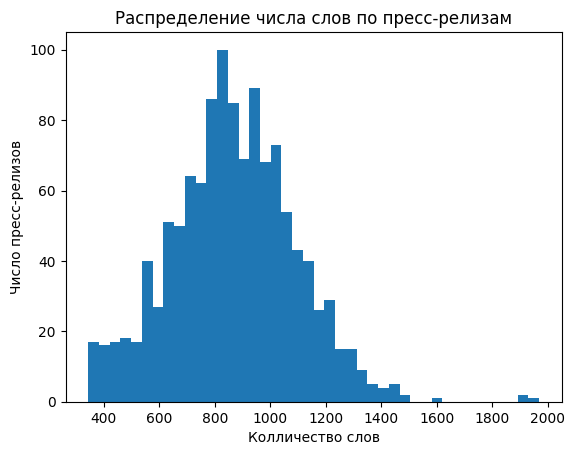

In [ ]:
num_bins = 42
fig, ax = plt.subplots()
plt.hist(word_count, bins=num_bins)
plt.xlabel('Колличество слов')
plt.ylabel('Число пресс-релизов')
plt.title("Распределение числа слов по пресс-релизам")
plt.show()

<Axes: xlabel='word_count', ylabel='Count'>

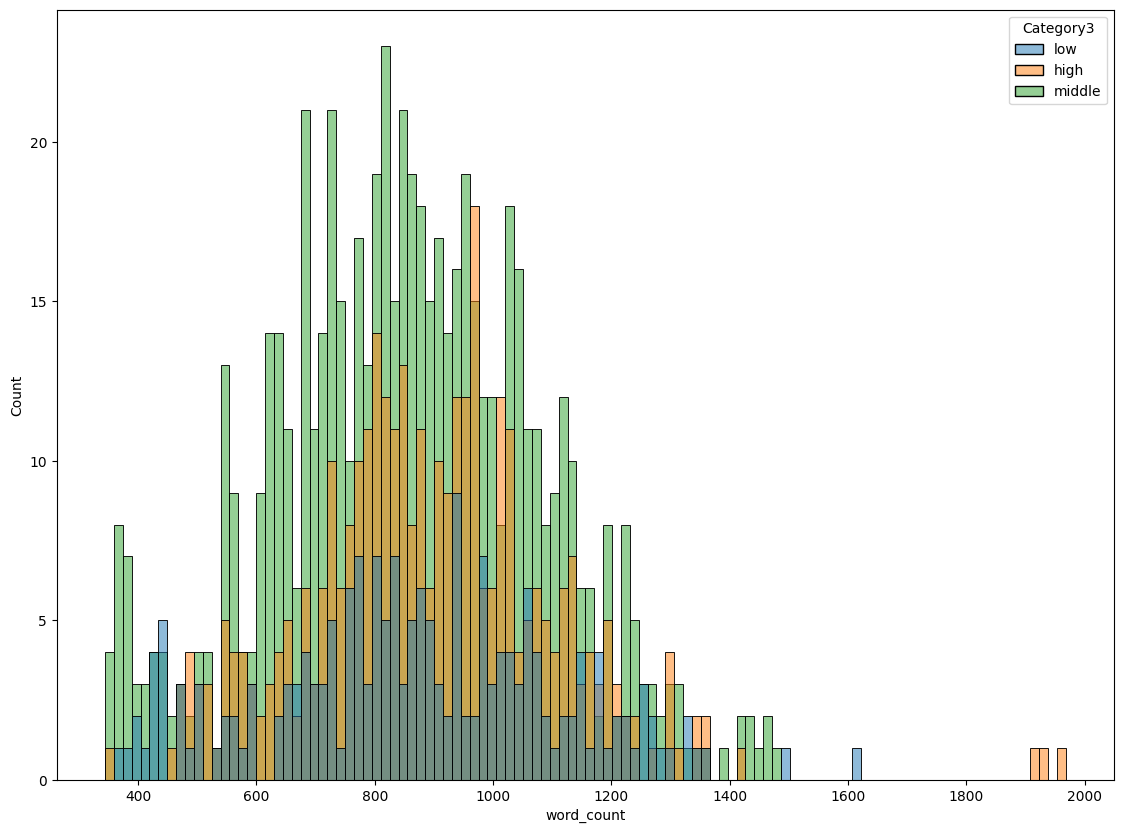

In [ ]:
fig = plt.figure()
fig.set_size_inches(30, 10)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='word_count', hue='Category3', binwidth=15, ax = plt.gca(), hue_order = ["low", "high", "middle"])

In [ ]:
# каждый пресс-релиз сохраним обратно просто как набор слов, не деля на предложения
data["cleaned_pr_bw"] = [" ".join(pr) for pr in cleaned_words]


## Анализ тональности (Будем применять по предложениям в данном конкретном пресс-релизе, а затем усреднять score выданный моделью dostoevsky) НЕ РАБОТАЕТ ввиду формальности юридических текстов

In [ ]:
!pip install dostoevsky


In [ ]:
!python -m dostoevsky download fasttext-social-network-model

In [ ]:
from scipy.special import softmax
from collections import OrderedDict
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

def press_release_sentiment(sentences : list):
  """
  Считает для каждого предлодения в данном пресс-релизе score negative, positive, neutral,
  а затем софтмаксом выбираем максимальный
  """
  results = model.predict(sentences, k=1)
  score_accum = OrderedDict({"positive" : 0.0, "negative" : 0.0, "neutral" : 0.0})
  for score_dict in results:
    if any(k in score_dict for k in ["positive", "negative", "neutral"]):
      max_key = max(score_dict, key=score_dict.get)
      score_accum[max_key] += score_dict[max_key]
  scores = softmax(list(score_accum.values()))
  indx_max = np.argmax(scores)
  prediction = {}
  match indx_max:
    case 0:
      prediction["positive"] = scores[indx_max]
    case 1:
      prediction["negative"] = scores[indx_max]
    case 2:
      prediction["neutral"] = scores[indx_max]
  return list(prediction.keys())[0], list(prediction.values())[0]

In [ ]:
from scipy.special import softmax
from collections import OrderedDict
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

def press_release_sentiment(sentences : list):
  """
  Считает для каждого предлодения в данном пресс-релизе score negative, positive,
  а затем софтмаксом выбираем максимальный
  """
  results = model.predict(sentences, k=1)
  score_accum = OrderedDict({"positive" : 0.0, "negative" : 0.0})
  for score_dict in results:
    if any(k in score_dict for k in ["positive", "negative"]):
      max_key = max(score_dict, key=score_dict.get)
      score_accum[max_key] += score_dict[max_key]
  scores = softmax(list(score_accum.values()))
  indx_max = np.argmax(scores)
  prediction = {}
  match indx_max:
    case 0:
      prediction["positive"] = scores[indx_max]
    case 1:
      prediction["negative"] = scores[indx_max]
  return list(prediction.keys())[0], list(prediction.values())[0]

In [ ]:
from scipy.special import softmax
from collections import OrderedDict
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

def press_release_sentiment2(sentences : list):
  """
  Доля позитивных предлодений в пресс-релизе
  """
  results = model.predict(sentences, k=1)
  score_accum = OrderedDict({"positive" : 0.0})
  count = 0
  for score_dict in results:
    if any(k in score_dict for k in ["positive"]):
      max_key = max(score_dict, key=score_dict.get)
      score_accum[max_key] += score_dict[max_key]
      count +=1

  return count

In [ ]:
data["sentiment_score3"] = np.nan
data["sentiment3"] = np.nan
for i,pr in enumerate(cleaned_sentences):
  data.loc[i+1, "sentiment3"] = press_release_sentiment2(pr)

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 6)
sns.boxplot(data = data, x = "Category", hue = "sentiment3", ax = plt.gca())
plt.title("Корреляуия тональности с таргетом")

In [ ]:
data["sentiment2"].value_counts()

other       915
positive    285
Name: sentiment2, dtype: int64

Text(0.5, 1.0, 'Корреляуия тональности с таргетом')

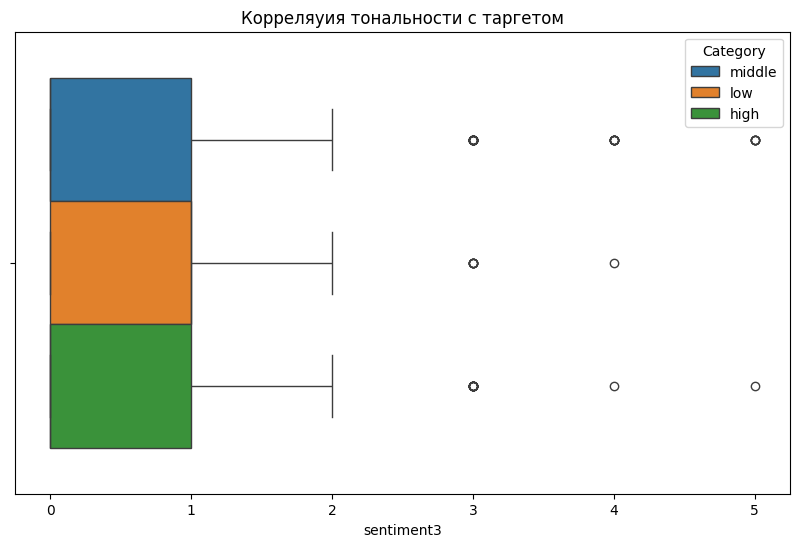

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 6)
sns.boxplot(data = data, x = "sentiment3", hue = "Category", ax = plt.gca())
plt.title("Корреляуия тональности с таргетом")

Text(0.5, 1.0, 'Корреляуия тональности с таргетом')

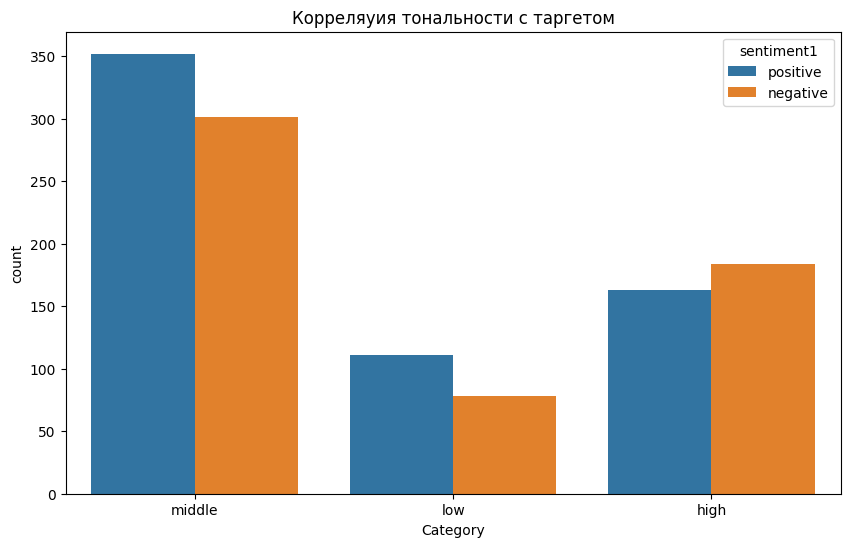

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 6)
sns.countplot(data = data, x = "Category", hue = "sentiment1", ax = plt.gca())
plt.title("Корреляуия тональности с таргетом")

#  Проанализируем частоты 2-6grams. Также отбросим 30-50 самых частых фраз с самого начала, т.к. они видимо являются стандартными финансовыми формулировками, которые не имеют связь с таргетом. (Возможно в будущем стандартную кредитную терминологию нужно добвавлять в stopwords на этапе обработки, т.к. она появляется одинаково часто в позитивных и негативных пресс-релизах)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n_gram : tuple, n_start = 0, n_top= 1):
    """
    Считает n_top по частоте появления n_gram  в тексте
    (возможен отступ в n_start слов в начале, чтобы исключить общие часто используемые термины для данноц области,
    в идеале такую терминологию надо отправить в stopwords)
    """
    vec = CountVectorizer(ngram_range=(n_gram, n_gram), analyzer="word").fit(corpus)
    bag_of_words = vec.transform(corpus) # document term matrix
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[ n_start:n_top]

In [ ]:
from tqdm import tqdm
ngrams = {"2gram" : 2, "3gram" : 3, "4gram" : 4, "5gram" : 5, "6gram" : 6}
df_ngrams =  pd.DataFrame()
for name, val in tqdm(ngrams.items()):
  ngrams_good = get_top_ngram(data.loc[data["Category2"] == 'good', 'cleaned_pr_bw'], val, n_start = 200, n_top = 200 + 20)
  ngrams_bad = get_top_ngram(data.loc[data["Category2"] == 'bad', 'cleaned_pr_bw'], val, n_start = 200, n_top = 200 + 20)
  df_ngrams[[name + "_g", name + "_count_g"]] = ngrams_good
  df_ngrams[[name + "_b", name + "_count_b"]] = ngrams_bad

100%|██████████| 5/5 [00:38<00:00,  7.64s/it]


<Axes: ylabel='2gram_b'>

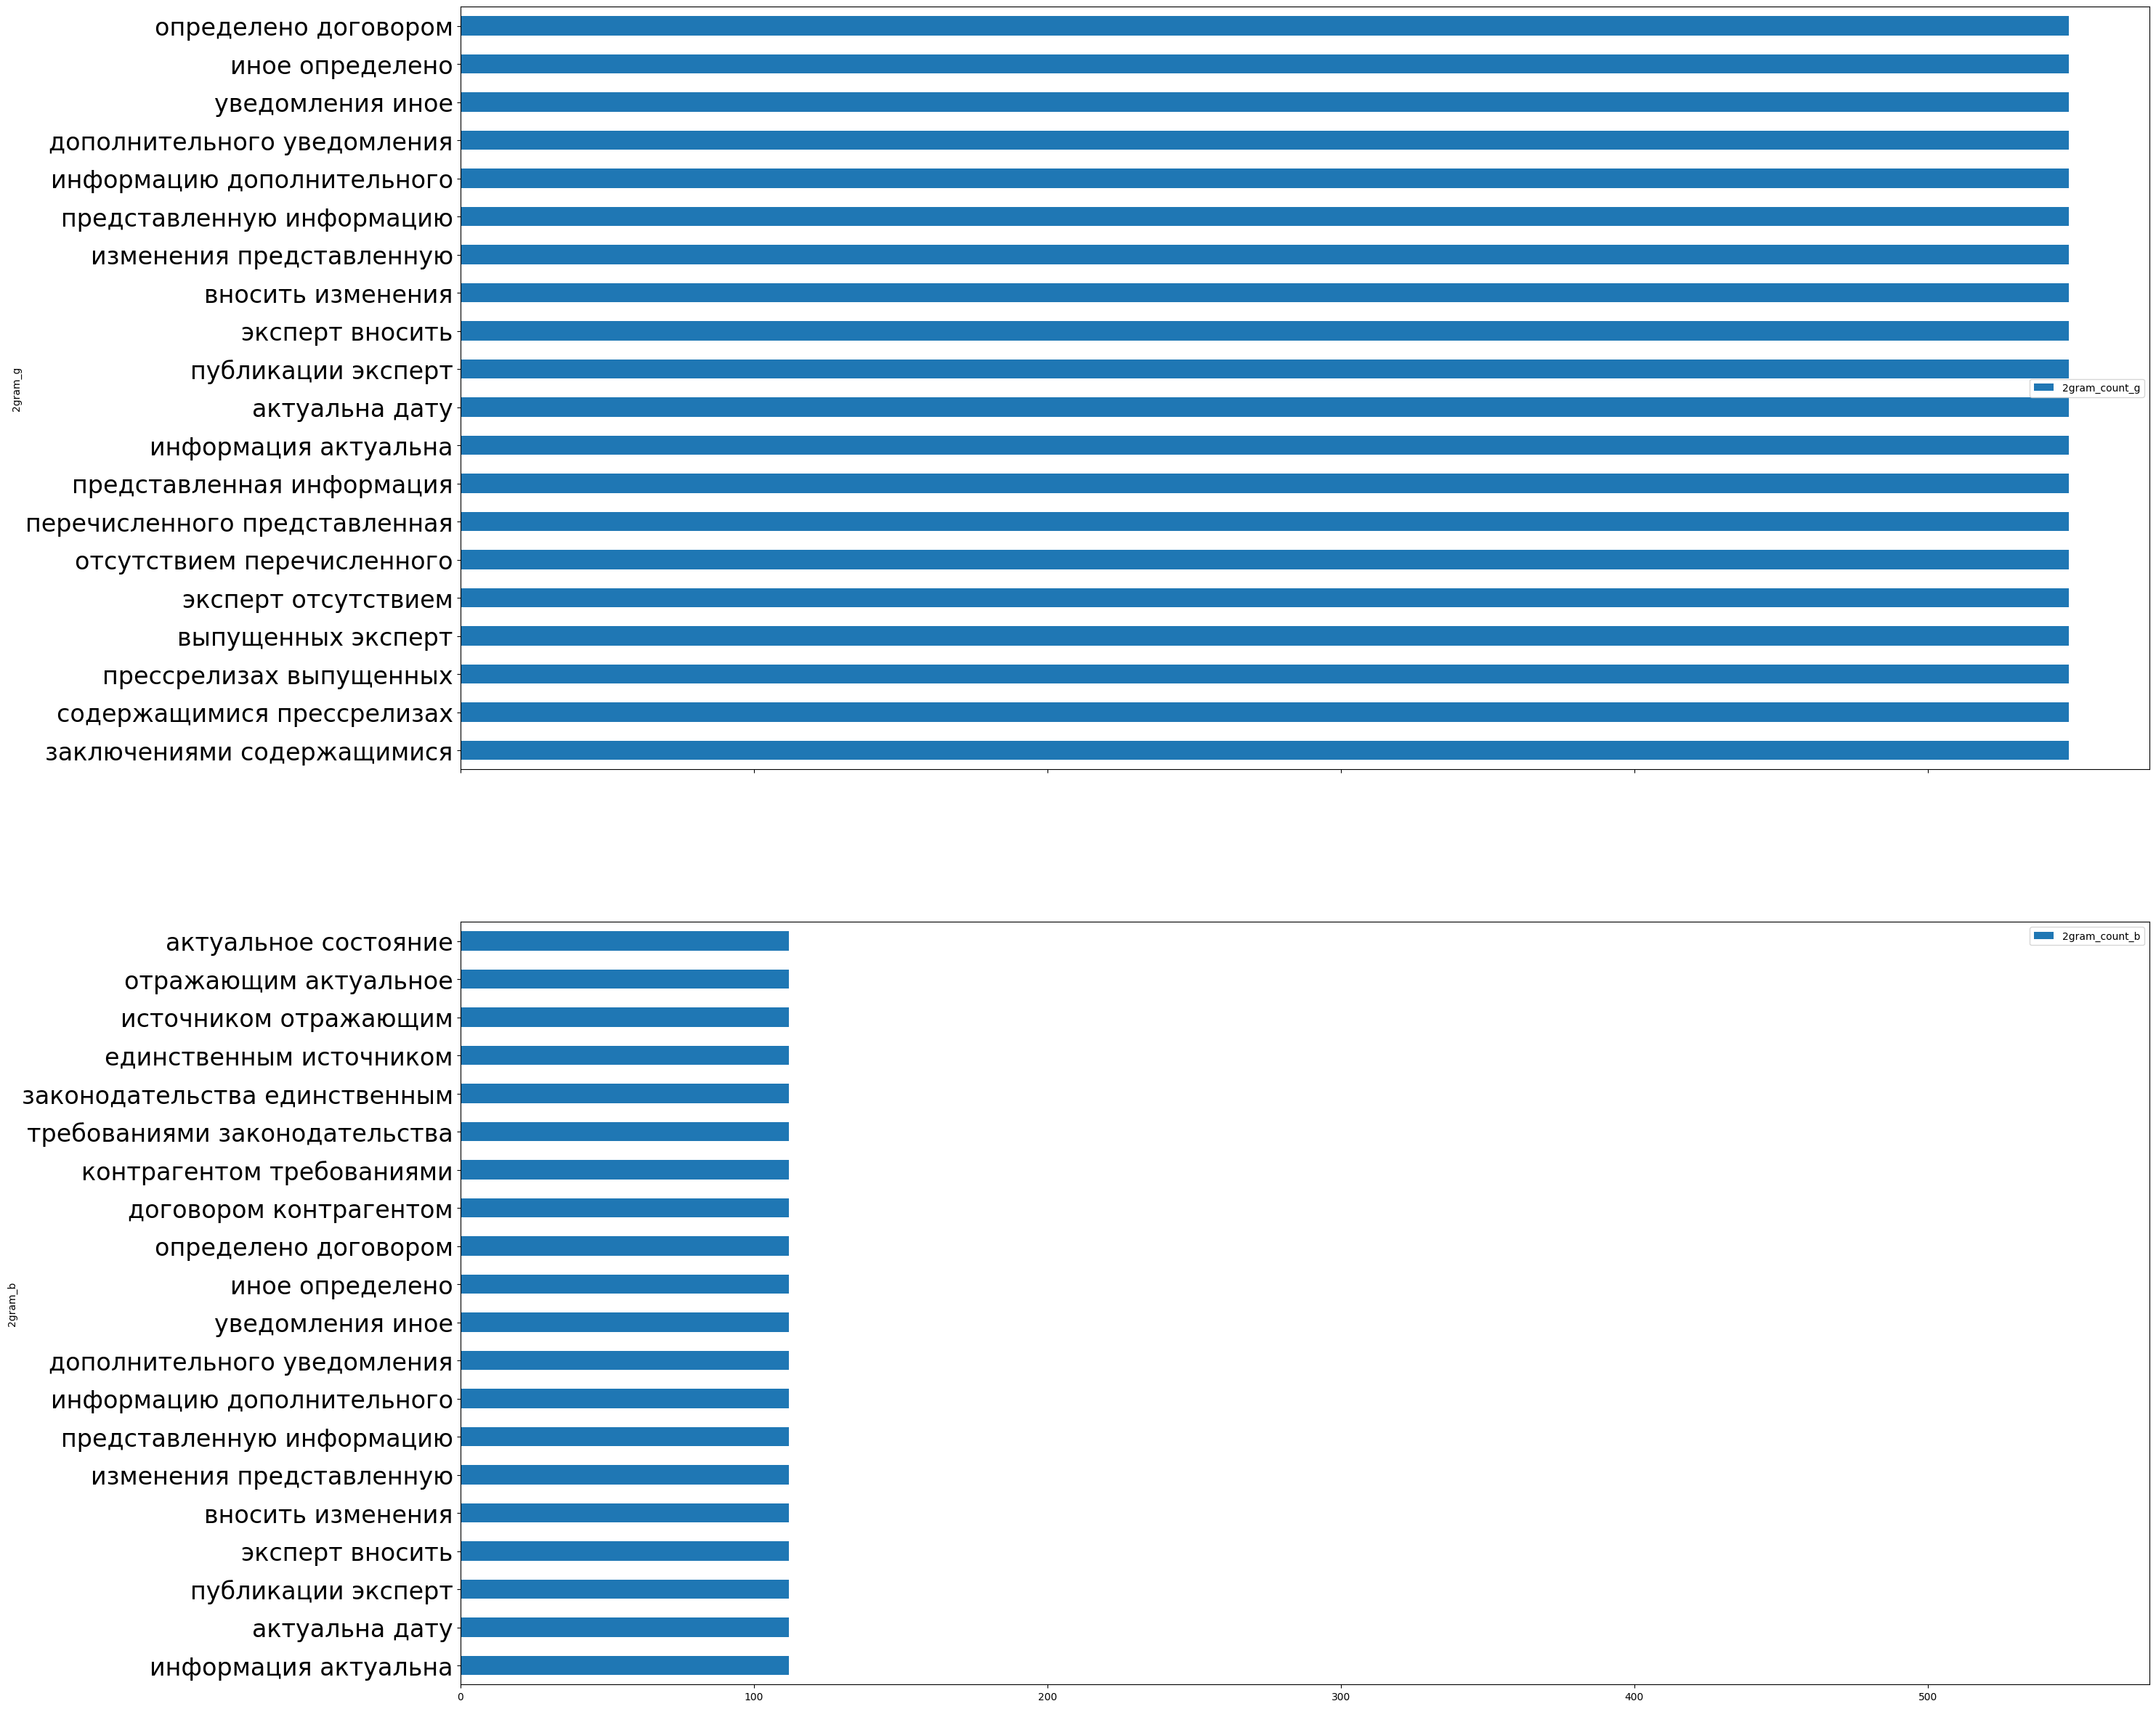

In [ ]:
fig, axis = plt.subplots(2,1, sharex=True)
fig.set_size_inches(30,30)
axis[0].yaxis.set_tick_params(labelsize=24)
axis[1].yaxis.set_tick_params(labelsize=24)

df_ngrams.plot.barh(x = "2gram_g", y = "2gram_count_g", ax = axis[0])
df_ngrams.plot.barh(x = "2gram_b", y = "2gram_count_b", ax = axis[1])

<Axes: ylabel='3gram_b'>

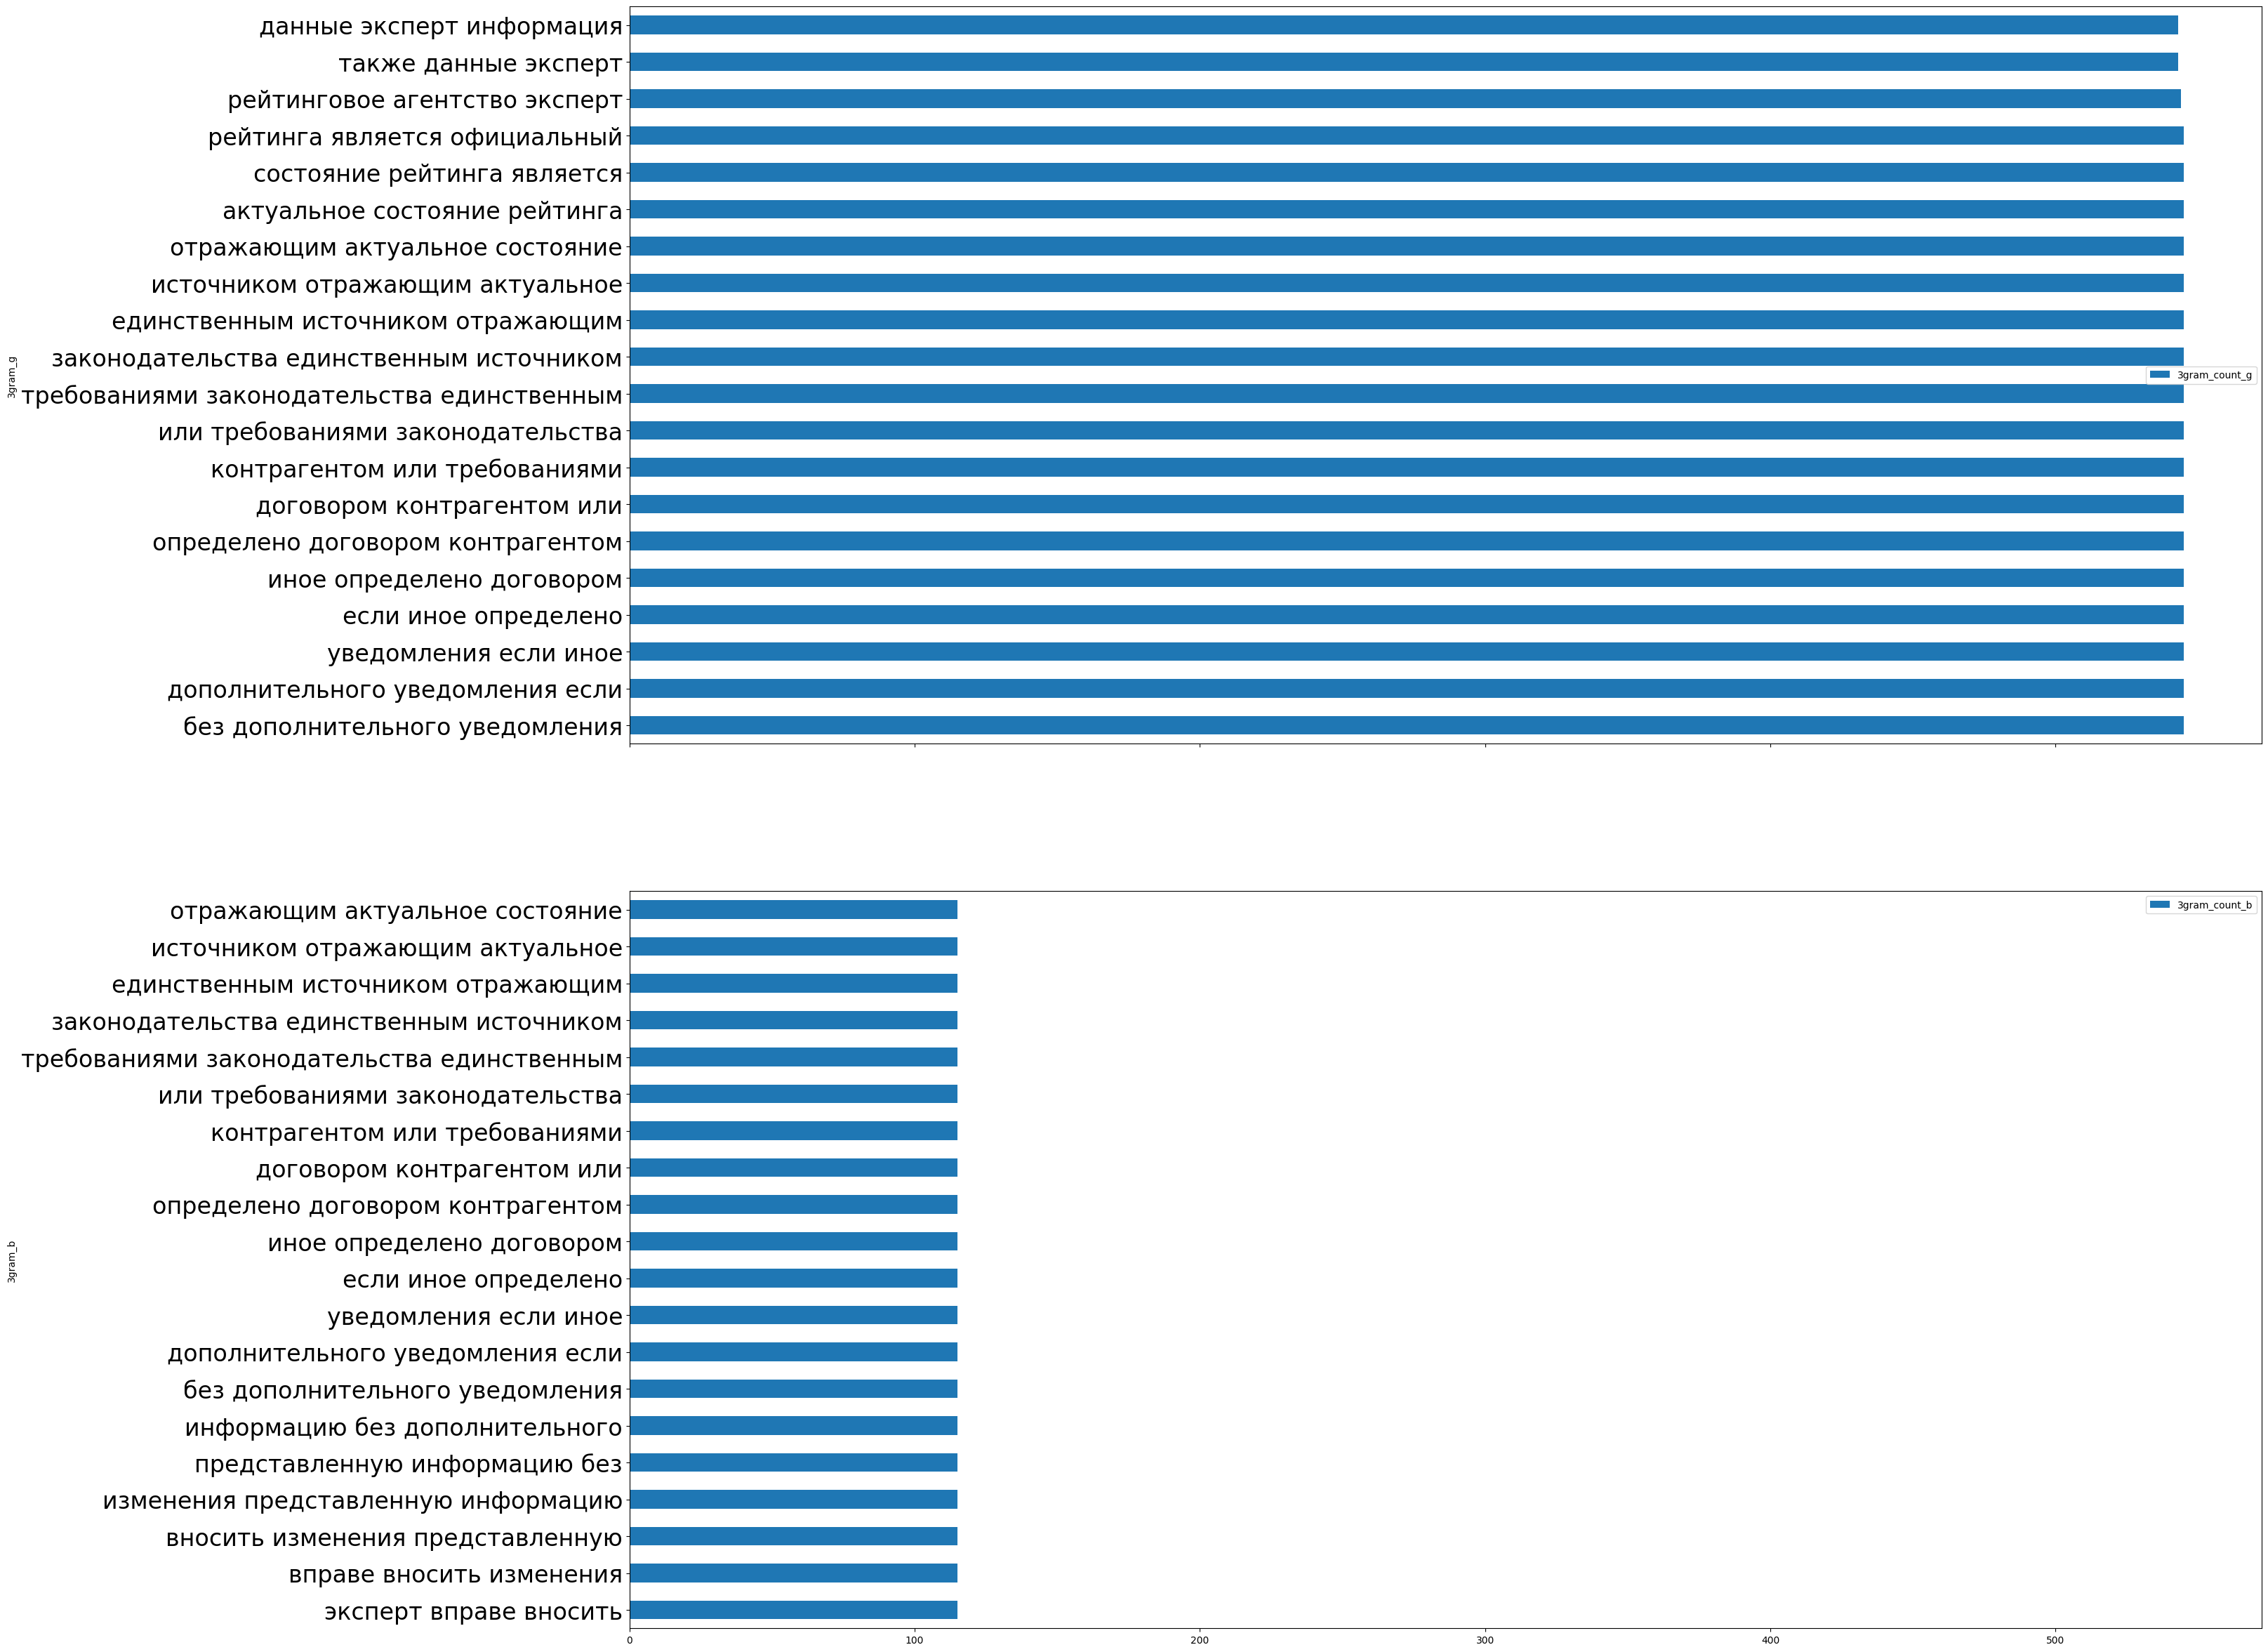

In [ ]:
fig, axis = plt.subplots(2,1, sharex=True)
fig.set_size_inches(30,30)
axis[0].yaxis.set_tick_params(labelsize=24)
axis[1].yaxis.set_tick_params(labelsize=24)

df_ngrams.plot.barh(x = "3gram_g", y = "3gram_count_g", ax = axis[0])
df_ngrams.plot.barh(x = "3gram_b", y = "3gram_count_b", ax = axis[1])

<Axes: ylabel='4gram_b'>

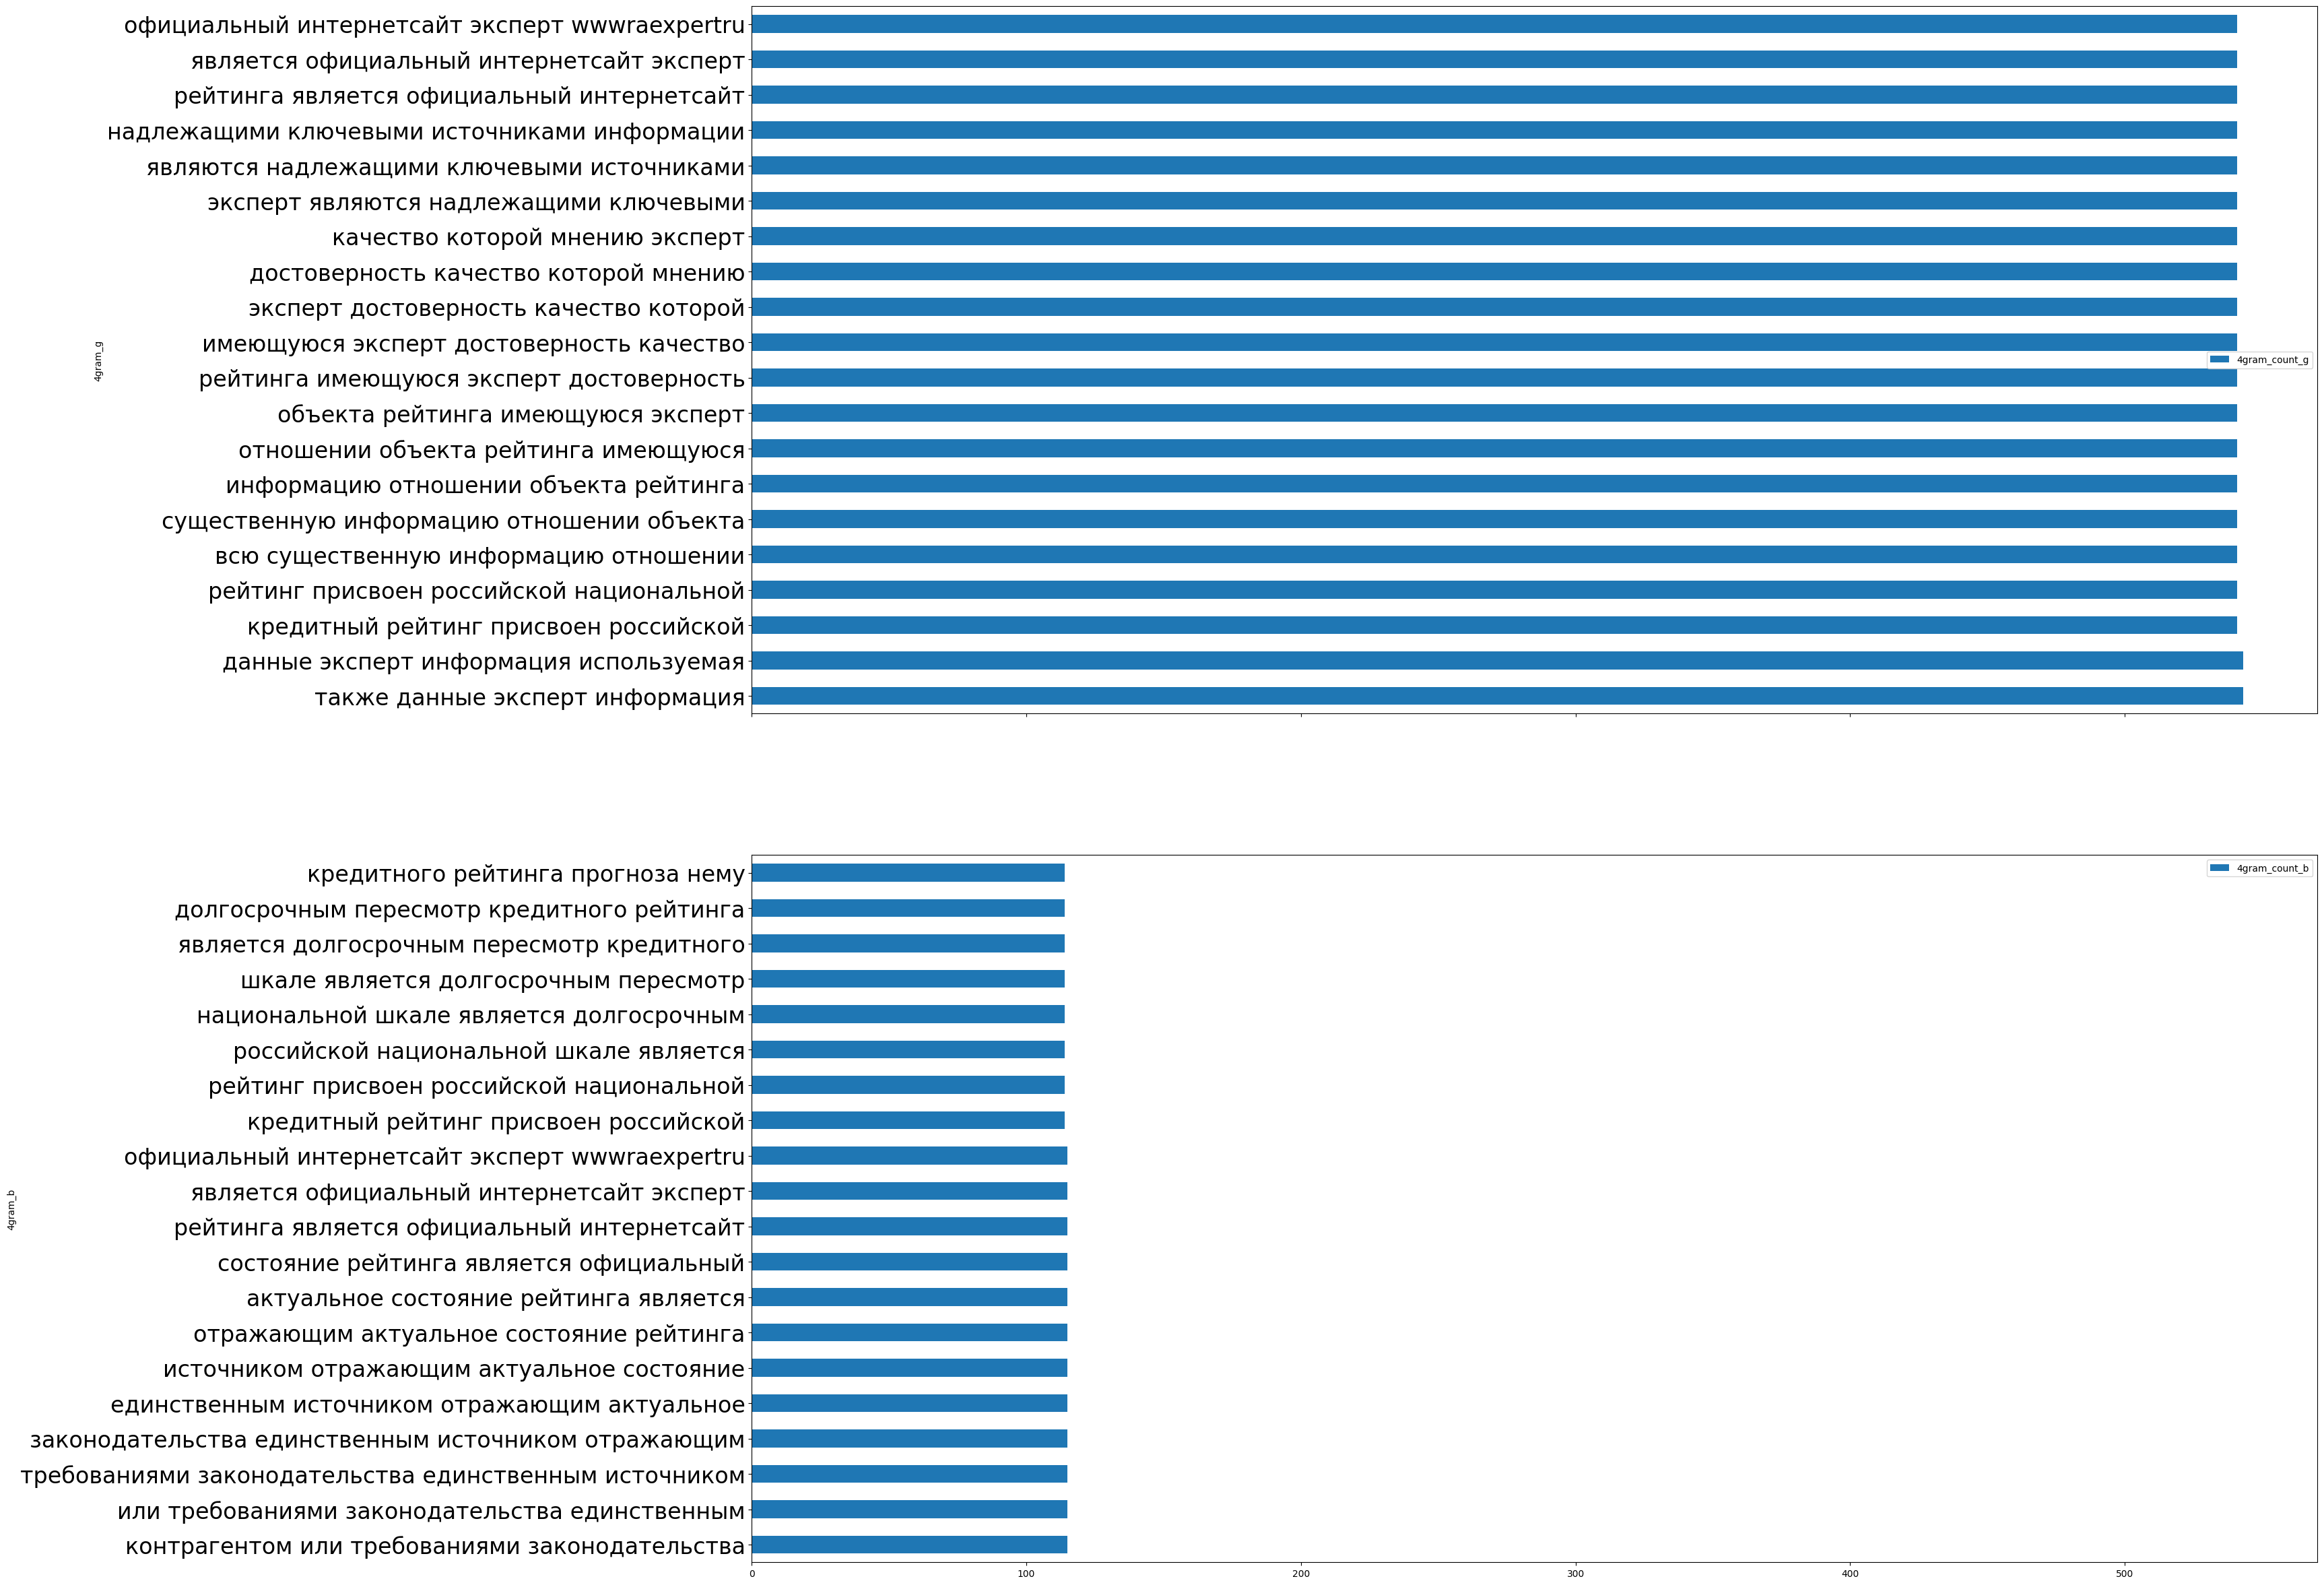

In [ ]:
fig, axis = plt.subplots(2,1, sharex=True)
fig.set_size_inches(30,30)
axis[0].yaxis.set_tick_params(labelsize=24)
axis[1].yaxis.set_tick_params(labelsize=24)

df_ngrams.plot.barh(x = "4gram_g", y = "4gram_count_g", ax = axis[0])
df_ngrams.plot.barh(x = "4gram_b", y = "4gram_count_b", ax = axis[1])

<Axes: ylabel='5gram_b'>

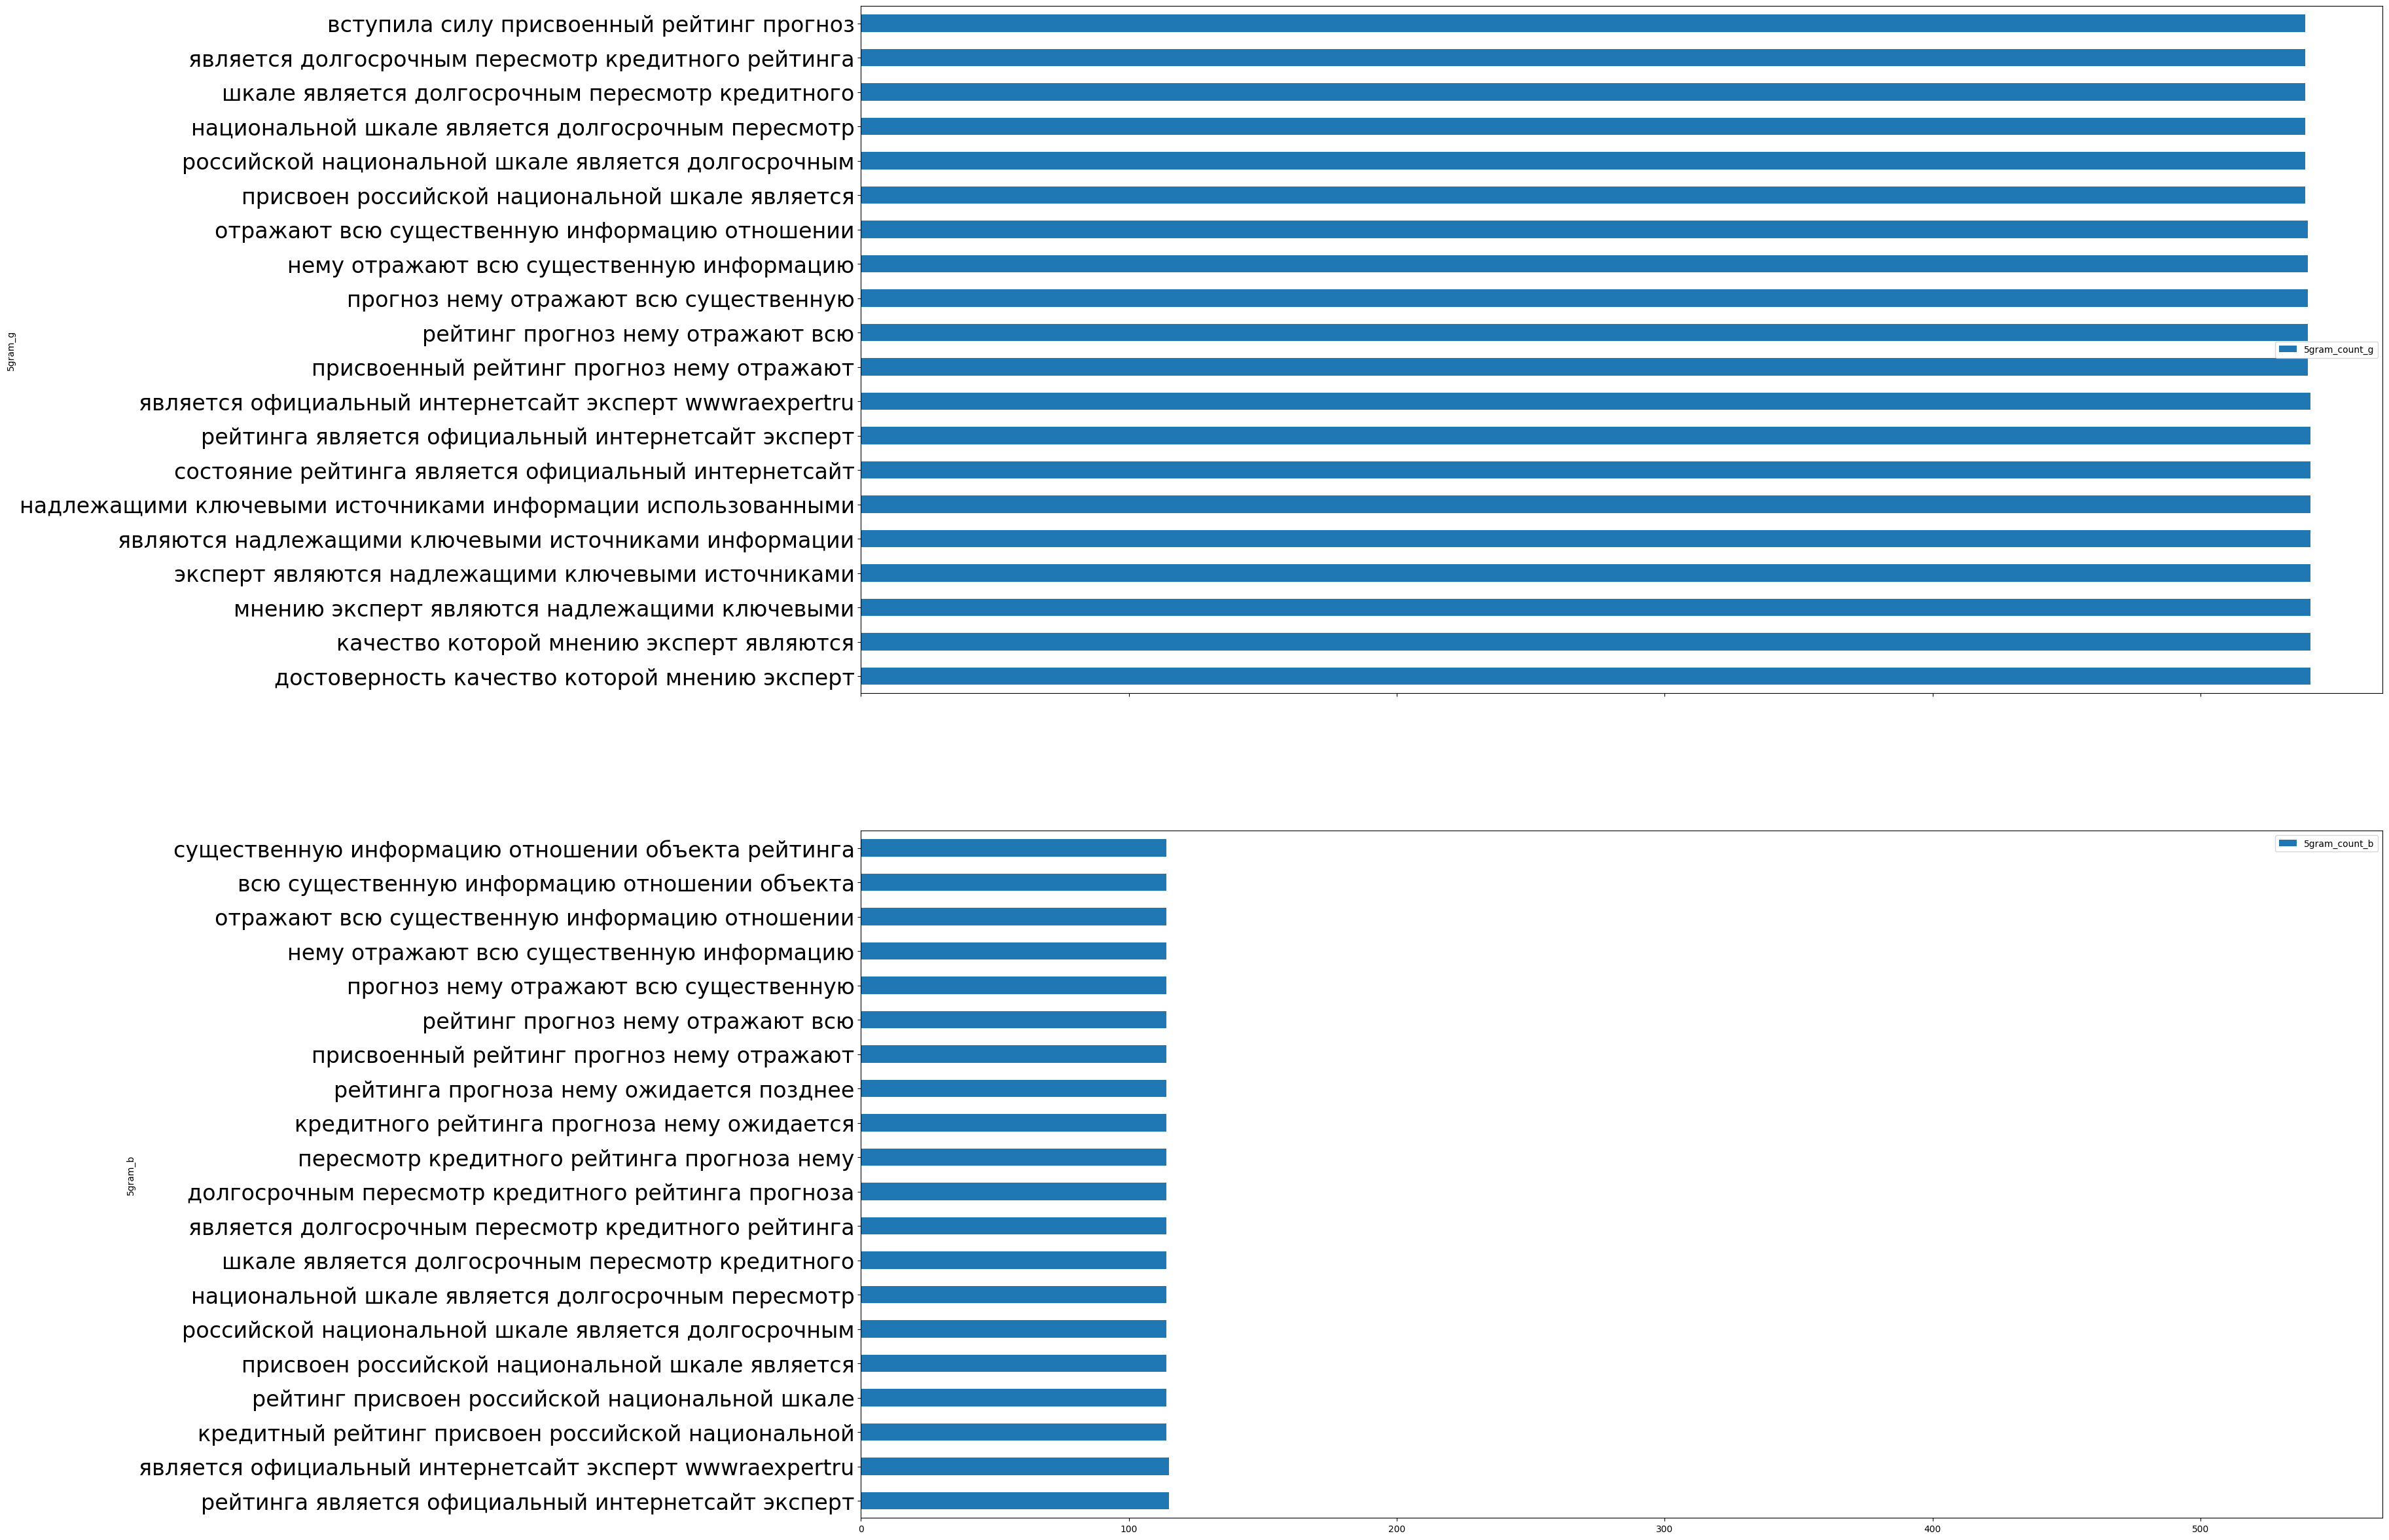

In [ ]:
fig, axis = plt.subplots(2,1, sharex=True)
fig.set_size_inches(30,30)
axis[0].yaxis.set_tick_params(labelsize=24)
axis[1].yaxis.set_tick_params(labelsize=24)

df_ngrams.plot.barh(x = "5gram_g", y = "5gram_count_g", ax = axis[0])
df_ngrams.plot.barh(x = "5gram_b", y = "5gram_count_b", ax = axis[1])

<Axes: ylabel='6gram_b'>

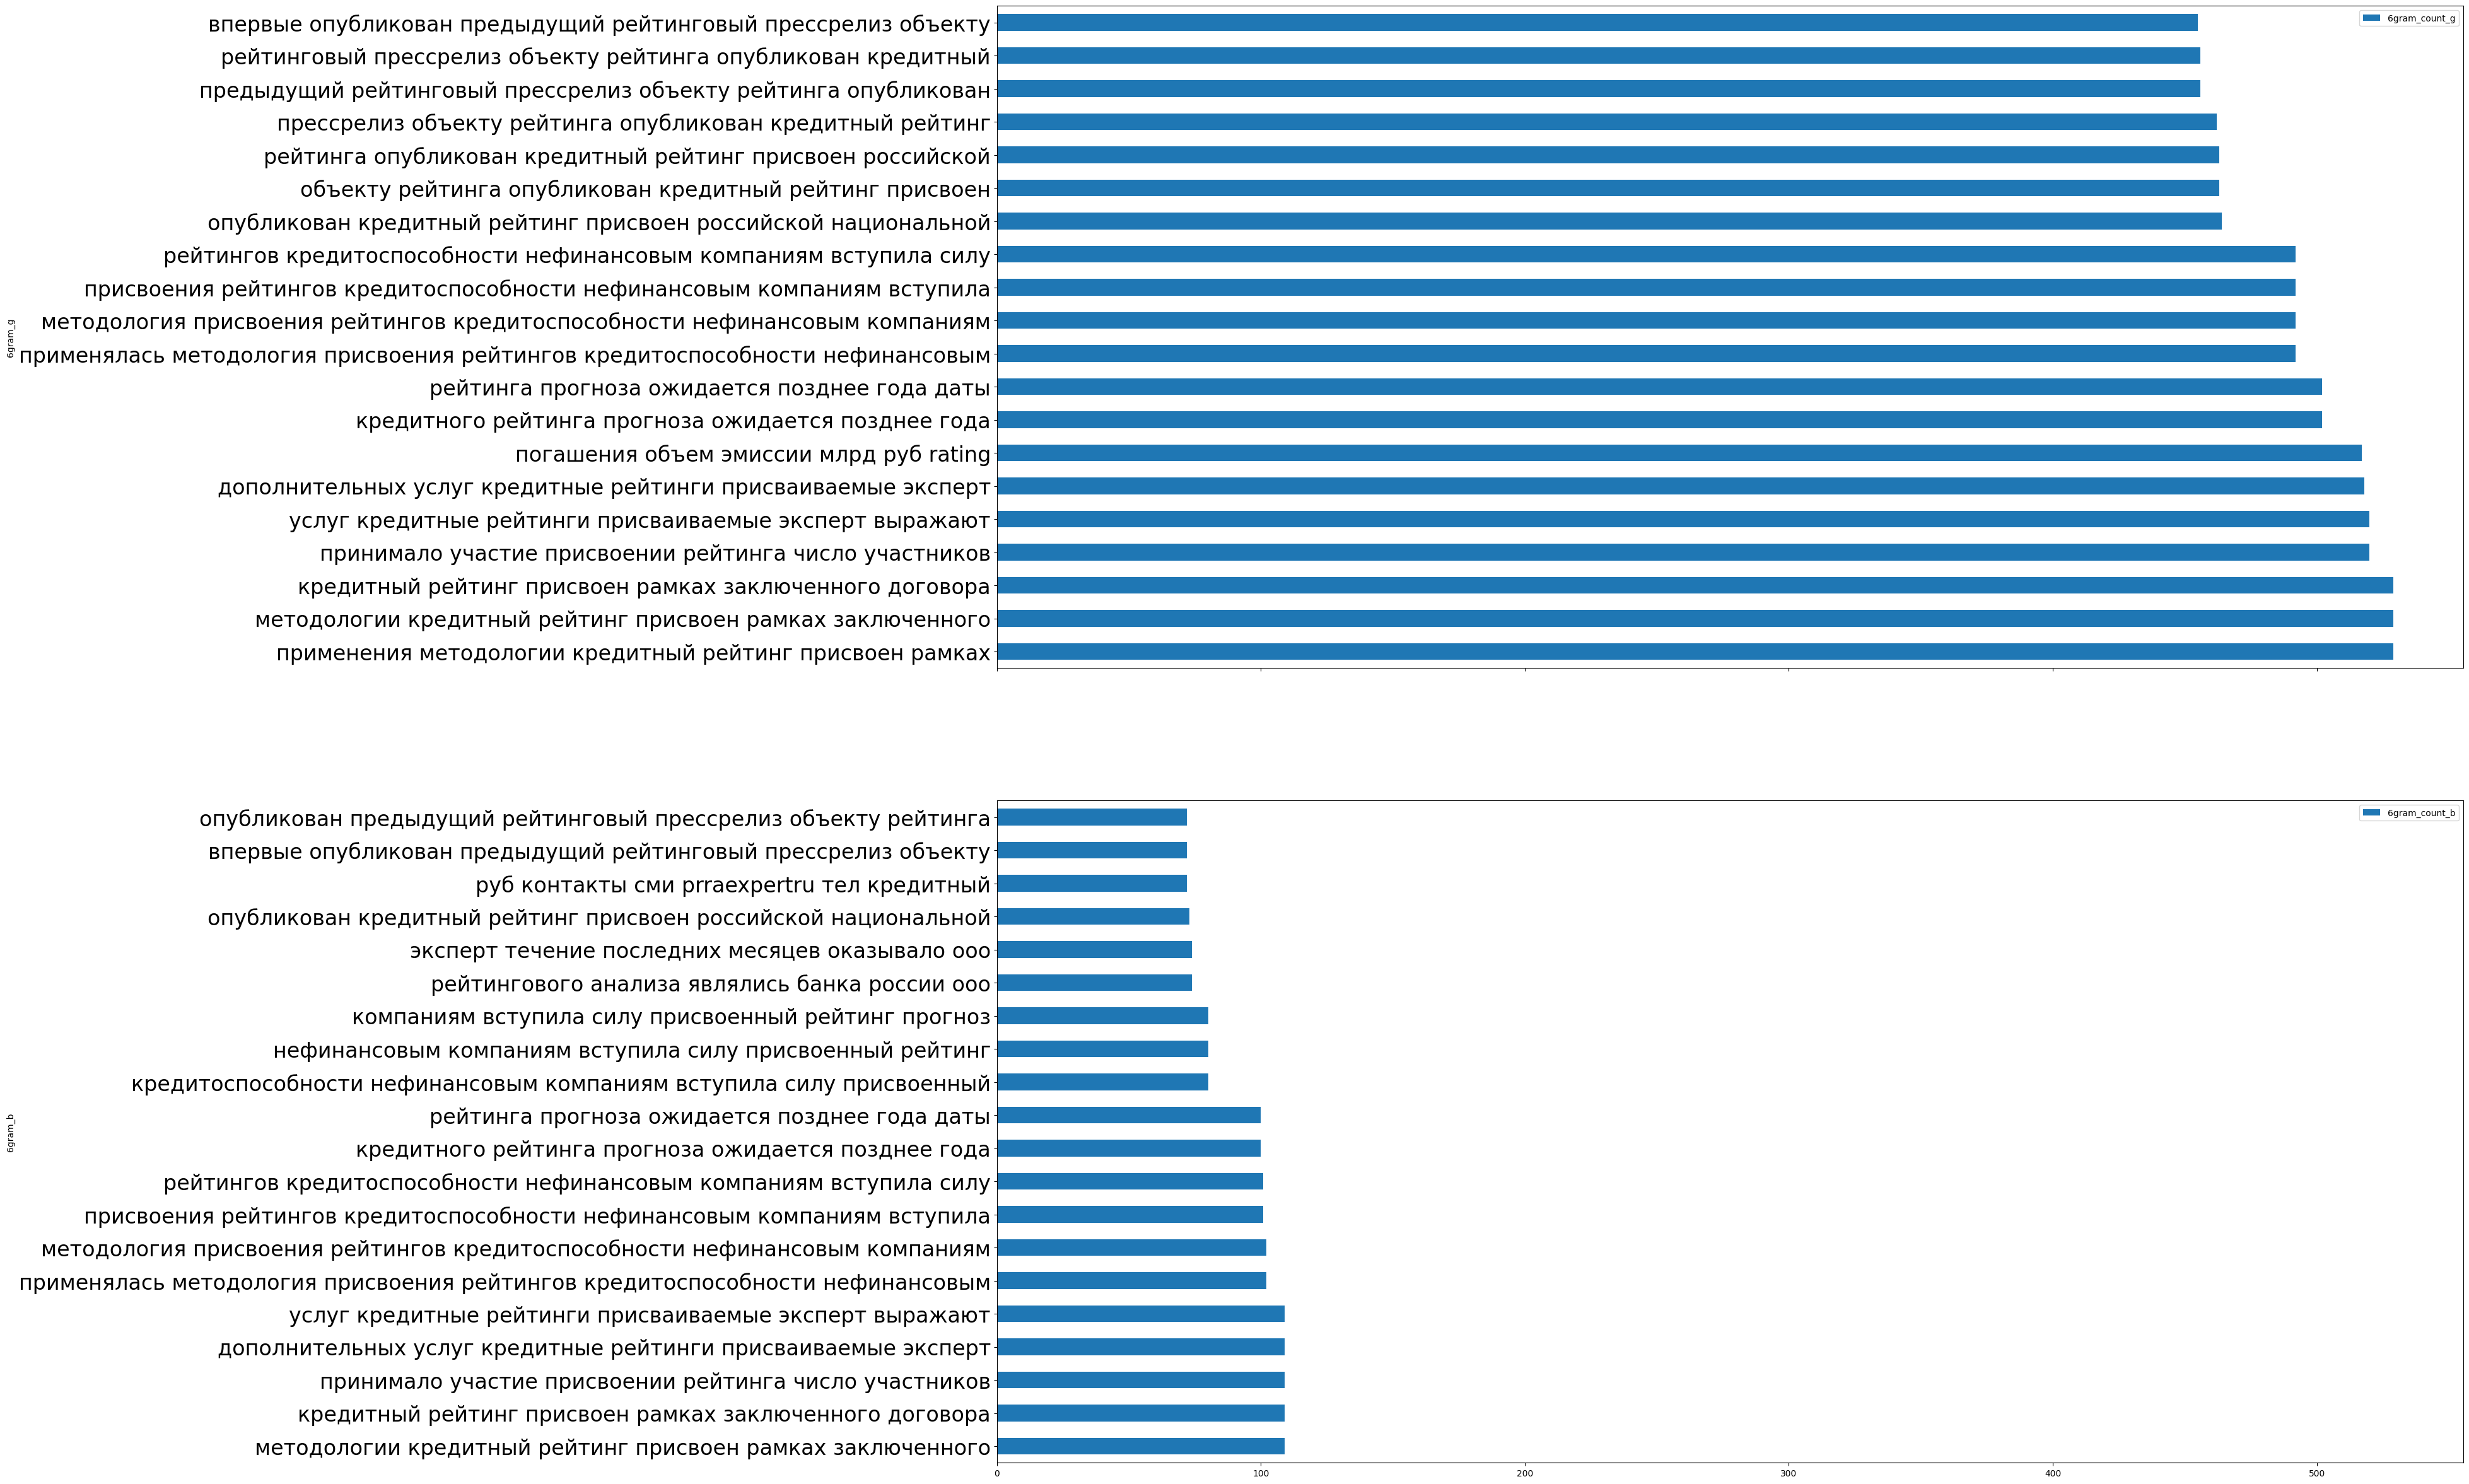

In [ ]:
fig, axis = plt.subplots(2,1, sharex=True)
fig.set_size_inches(30,30)
axis[0].yaxis.set_tick_params(labelsize=24)
axis[1].yaxis.set_tick_params(labelsize=24)

df_ngrams.plot.barh(x = "6gram_g", y = "6gram_count_g", ax = axis[0])
df_ngrams.plot.barh(x = "6gram_b", y = "6gram_count_b", ax = axis[1])

# (TODO) Попробуем провести PCA анализ, кластеризацию на основе TF_IDF для ngrams длиной порядка 6-8, т.к. необходимо учитывать контекст, а отдельных сильно уникальных слов у нас не много в юридических текстах, которые бы влияли на таргет, возможно существуют стандартные формулировки отказе/пересмотре кредита и ожидаем что они должны уместиться в 6-8gramm

In [ ]:
!pip install unidecode
!pip install -U "gensim==4.2.0"
!pip install -U "texthero==1.0.5"

  Using cached Unidecode-1.3.8-py3-none-any.whl (235 kB)


In [ ]:
import texthero as hero

In [ ]:
data['pca'] = (data['cleaned_pr'].pipe(hero.do_tfidf).pipe(hero.do_pca,n_components = 2))
hero.scatterplot(data, 'pca', color='Category2', title='PCA')

# На чистых данных
# Логистическая регрессия на unigrams достигнута f1 = 0.96 (GridSearch)

{'clf__C': 1000,
 'vect__max_df': 612,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1)}
# Логистическая регрессия на 3-grams достигнута f1 = 0.954 (GridSearch)
{'clf__C': 1000,
 'vect__max_df': 120,
 'vect__min_df': 5,
 'vect__ngram_range': (3, 3)}

# Логистическая регрессия на 5-grams достигнута f1 = 0.951 (GridSearch)
{'clf__C': 1000,
 'vect__max_df': 2,
 'vect__min_df': 1,
 'vect__ngram_range': (5, 5)}


In [ ]:
ngram = 1
max_df = 1000 # термины появляющиеся чаще чем 1000 раз среди 1200 документов - видимо стандартные формулировки и не влияют на таргет существенно
min_df = 20 # термины появляющиеся менее 20 раз - скорее всего опечатки, мусор и т.п (малый класс плохих рейтингов порядка 200, поэтому больше это число брать не желательно)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Category2"])

X_train, X_test, y_train, y_test = train_test_split(data[["cleaned_pr_bw"]], y, test_size=0.3, random_state=17)

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

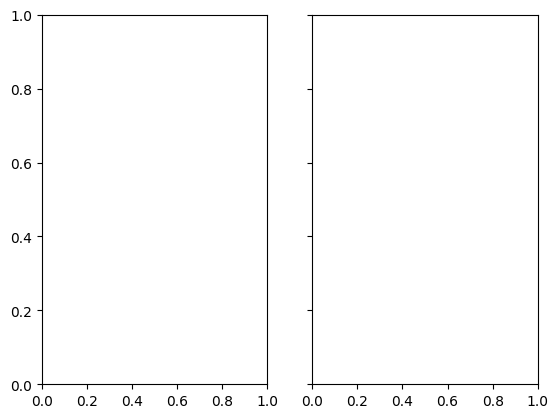

In [ ]:
# проверим балансировку классов в тест и трейн
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
sns.countplot(data = y_train, x = "Category2", ax = ax1)
sns.countplot(data = y_test, x = "Category2", ax = ax2)

Преобразование данных в числовые вектора

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# to_binary = OneHotEncoder(drop = "if_binary", sparse_output=False)
# y_train1 = to_binary.fit_transform(y_train[["Category2"]]).ravel()
# y_test1 = to_binary.fit_transform(y_test[["Category2"]]).ravel()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

param_grid = {"vect__ngram_range" : [(5,5)], "vect__min_df" : [1], "vect__max_df" : [2],  "clf__C" : [1000]}
#vectorize_tfidf = ColumnTransformer(("tfidf", TfidfVectorizer(), ["Category2"]))
#vectorize_tfidf = make_column_transformer(TfidfVectorizer(ngram_range=(ngram,ngram), max_df = max_df, min_df = min_df)) #analyzer="word"
pipeline = Pipeline(steps = [("vect", TfidfVectorizer()),\
                             ("clf", LogisticRegression(max_iter = 150))])
#pipeline = Pipeline(vectorize_tfidf, LogisticRegression())
model = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

In [ ]:
model.fit(X_train["cleaned_pr_bw"], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=150))]),
             param_grid={'clf__C': [1000], 'vect__max_df': [2],
                         'vect__min_df': [1], 'vect__ngram_range': [(5, 5)]},
             scoring='f1')

In [ ]:
model.best_index_

41

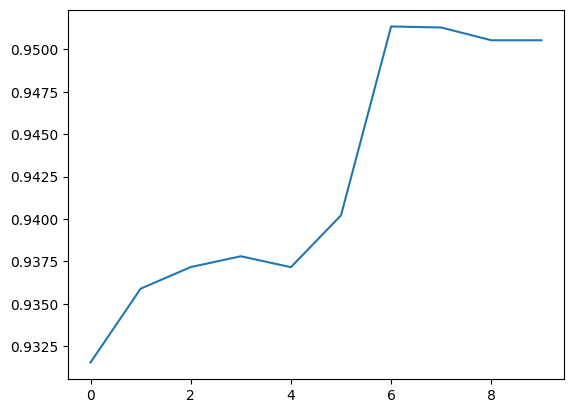

In [ ]:
plt.plot(model.cv_results_["mean_test_score"])

In [ ]:
model.best_score_

0.9545402364204449

In [ ]:
model.best_params_

{'clf__C': 1000,
 'vect__max_df': 2,
 'vect__min_df': 1,
 'vect__ngram_range': (5, 5)}

In [ ]:
# достанeм лучшую модель из gridSearch
model1 = model.best_estimator_

In [ ]:
# weights
weights = model1.named_steps.clf.coef_
np.min(abs(weights)) # есть не существенные признаки

0.001111807095518425

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=150))]),
             param_grid={'clf__C': [10.0, 100.0, 1000.0, 10000],
                         'vect__max_df': [350, 400, 450, 500],
                         'vect__min_df': [1, 5, 10, 20, 30],
                         'vect__ngram_range': [(6, 6)]},
             scoring='f1')

In [ ]:
# bias
intercept = model1.named_steps.clf.intercept_
intercept

array([6.21917033])

In [ ]:
model.score(X_test["cleaned_pr_bw"], y_test)


0.966183574879227

# Делим good класс (GridSearch)

In [ ]:
good = ["AAA", "AA", "A", "BBB"] # высокий уровень кредитоспособности

In [ ]:
# выделяем только good категорию, которую далее будем дробить на более мелкие
X_train_good = X_train[X_train["Категория"].isin(good)]

KeyError: 'Категория'

In [ ]:
very_good = ["AAA", "AA"]
quite_good = ["A", "BBB"]

def gen_new_feature2g2(val):
    """
    Создаёт новый бинарный таргет
    """
    new = int()
    if val in very_good:
      new = 1
    elif val in quite_good:
      new = 0
    return new

In [ ]:
# создаём новые фичи
X_train_good["Category2g2"] = X_train_good["Категория"].apply(gen_new_feature2g2)

<ipython-input-97-6374ef65a46e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_good["Category2g2"] = X_train_good["Категория"].apply(gen_new_feature2g2)


tf-idf генерируем заново на уменьшенном датасете

In [ ]:
# находим TF-IDF для 6-grams только на train для избежания data leakage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid1 = {"vect__ngram_range" : [(1,1)], "vect__min_df" : [ 1, 5, 10], "vect__max_df" : [216, 316, 416, 516],  "clf__C" : [2000, 3000, 4000, 5000]}
#vectorize_tfidf = ColumnTransformer(("tfidf", TfidfVectorizer(), ["Category2"]))
#vectorize_tfidf = make_column_transformer(TfidfVectorizer(ngram_range=(ngram,ngram), max_df = max_df, min_df = min_df)) #analyzer="word"
pipeline = Pipeline(steps = [("vect", TfidfVectorizer()),\
                             ("clf", LogisticRegression(max_iter = 200))])
#pipeline = Pipeline(vectorize_tfidf, LogisticRegression())
model = GridSearchCV(pipeline, param_grid1, cv=5, scoring='f1')

In [ ]:
model.fit(X_train_good["cleaned_pr_bw"], X_train_good["Category2g2"])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=200))]),
             param_grid={'clf__C': [2000, 3000, 4000, 5000],
                         'clf__dual': [False, True],
                         'vect__max_df': [216, 316, 416, 516],
                         'vect__min_df': [1, 5, 10],
                         'vect__ngram_range': [(1, 1)]},
             scoring='f1')

In [ ]:
model.best_params_

{'clf__C': 4000,
 'clf__dual': False,
 'vect__max_df': 316,
 'vect__min_df': 5,
 'vect__ngram_range': (1, 1)}

In [ ]:
model.best_score_

0.9114182177946095

tf_idf наследуем от первого сплита

# TODO: Пайплайн иерархической классификации на high, middle, low

Делим на good(high, middle)/bad(low) логистическая регрессия

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Category2"])
X_train, X_test, y_train, y_test = train_test_split(data[["cleaned_pr_bw"]], y, test_size=0.4, random_state=17)


In [ ]:
# находим TF-IDF для 6-grams только на train для избежания data leakage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# ngram_range = (1,1), min_df = 20, max_df = 1000
clf_1 = Pipeline(steps = [("vect", TfidfVectorizer()),\
                             ("clf", LogisticRegression(max_iter = 200, C = 300))])

In [ ]:
tf_idf_train = clf_1.named_steps["vect"].fit_transform((X_train["cleaned_pr_bw"]))

In [ ]:
clf_1.fit(X_train["cleaned_pr_bw"], y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=300, max_iter=200))])

In [ ]:
clf_1.classes_

array([0., 1.])

In [ ]:
from sklearn.metrics import f1_score
f1_score(clf_1.predict(X_test["cleaned_pr_bw"]), y_test)

0.9600997506234412

Делим good на very_good и quite_good

In [ ]:
clf_1.predict(y_test)

array([1., 1.])

# Классификация на high, middle, low ипсользуя Multinomial/OvR подход

model.best_params_
{'clf__C': 1000,
 'clf__multi_class': 'multinomial',
 'vect__max_df': 800,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1)}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Category3"])
X_train, X_test, y_train, y_test = train_test_split(data[["cleaned_pr_bw"]], y, test_size=0.2, random_state=17)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid1 = {"vect__ngram_range" : [(1,1), (2,2), (3,3)], "vect__min_df" : [ 1, 5, 10, 20], "vect__max_df" : [700, 800, 900],  "clf__C" : [0.1, 1, 10, 100, 1000],\
               "clf__multi_class" : ["ovr", "multinomial"] }
#vectorize_tfidf = ColumnTransformer(("tfidf", TfidfVectorizer(), ["Category2"]))
#vectorize_tfidf = make_column_transformer(TfidfVectorizer(ngram_range=(ngram,ngram), max_df = max_df, min_df = min_df)) #analyzer="word"
pipeline = Pipeline(steps = [("vect", TfidfVectorizer()),\
                             ("clf", LogisticRegression(max_iter = 200))])
#pipeline = Pipeline(vectorize_tfidf, LogisticRegression())
model = GridSearchCV(pipeline, param_grid1, cv=5, scoring="f1_macro")

In [ ]:
model.fit(X_train["cleaned_pr_bw"], y_train)

In [ ]:
model.best_params_

{'clf__C': 1000,
 'clf__multi_class': 'multinomial',
 'vect__max_df': 800,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1)}

In [ ]:
model.best_score_

0.91669441740387

In [ ]:
model.classes_

array([0, 1, 2])

In [ ]:
model.predict(X_test)

array([2])

In [ ]:
le.inverse_transform([0, 1, 2])



array(['high', 'low', 'middle'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test["cleaned_pr_bw"])))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        76
           1       0.86      0.76      0.81        33
           2       0.91      0.96      0.93       131

    accuracy                           0.93       240
   macro avg       0.92      0.88      0.90       240
weighted avg       0.93      0.93      0.92       240



# Decision Tree для классификации по 3 классам
{'clf__criterion': 'entropy',
 'clf__max_depth': 11,
 'tfidf__max_df': 800,
 'tfidf__ngram_range': (2, 2)}
 {'clf__C': 1000,
 'clf__multi_class': 'ovr',
 'vect__max_df': 140,
 'vect__min_df': 1,
 'vect__ngram_range': (4, 4)}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data["Category3"])
X_train, X_test, y_train, y_test = train_test_split(data[["cleaned_pr_bw"]], y, test_size=0.2, random_state=17)


# Define the text processing pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

# Define the hyperparameter grid
param_grid = {
    'tfidf__min_df' : (1, 5, 10),
    'tfidf__max_df': (750, 800, 850),
    'tfidf__ngram_range': ((1, 1), (2,2), (3, 3)), # unigrams or bigrams
    'clf__criterion': ['entropy'],
    'clf__max_depth': range(10, 15)
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(text_clf, param_grid, cv=5, scoring="f1_macro")

# Fit GridSearchCV to your data
grid_search.fit(X_train["cleaned_pr_bw"], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['entropy'],
                         'clf__max_depth': range(10, 15),
                         'tfidf__max_df': (750, 800, 850),
                         'tfidf__min_df': (1, 5, 10),
                         'tfidf__ngram_range': ((1, 1), (2, 2), (3, 3))},
             scoring='f1_macro')

In [ ]:
grid_search.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 11,
 'tfidf__max_df': 850,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (2, 2)}

In [ ]:
best_model = grid_search.best_estimator_
best_model.score(X_test["cleaned_pr_bw"], y_test)

0.7875

In [ ]:
le.inverse_transform([0, 1, 2])

array(['high', 'low', 'middle'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model.predict(X_test["cleaned_pr_bw"])))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77        76
           1       0.80      0.48      0.60        33
           2       0.75      0.93      0.83       131

    accuracy                           0.79       240
   macro avg       0.81      0.70      0.73       240
weighted avg       0.80      0.79      0.78       240



# Baseline классификация логистической (multinomial) регрессией на 7 классов
{'clf__C': 100,
 'clf__multi_class': 'ovr',
 'vect__max_df': 450,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1)}
 {'clf__C': 1000,
 'clf__multi_class': 'ovr',
 'vect__max_df': 140,
 'vect__min_df': 1,
 'vect__ngram_range': (4, 4)}
 {'clf__C': 1000,
 'clf__multi_class': 'ovr',
 'vect__max_df': 80,
 'vect__min_df': 1,
 'vect__ngram_range': (3, 3)}

In [ ]:
data["Категория"].value_counts()

Категория
A      347
BBB    238
AA     185
AAA    135
BB     117
B       25
C        7
Name: count, dtype: int64

In [ ]:
data_test["Категория"].value_counts()

Категория
A      37
BBB    20
AAA    18
AA     12
BB     11
B      10
C       4
Name: count, dtype: int64

In [ ]:
# добавим 6 объектов B и 4 объекта С в тестовый датасет

In [ ]:
cat_B = data[data["Категория"] == "B"].iloc[:6]
cat_C = data[data["Категория"] == "C"].iloc[:4]

In [ ]:
data = data[~data["Id"].isin(cat_B["Id"])]
data = data[~data["Id"].isin(cat_C["Id"])]

In [ ]:
data_test = pd.concat([data_test, cat_B, cat_C])

In [ ]:
data.to_excel("clean_dataset_3_credit_ratings_agencies_TRAIN.xlsx", index=None)
data_test.to_excel("clean_dataset_3_credit_ratings_agencies_VALID.xlsx", index=None)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train = data[["cleaned_pr_bw"]]
y_train = le.fit_transform(data["Категория"])

X_test = data_test[["cleaned_pr_bw"]]
y_test = le.transform(data_test["Категория"])

#y= le.fit_transform(data["Категория"])

#X_train, X_test, y_train, y_test = train_test_split(data[["cleaned_pr_bw"]], y, test_size=0.15, random_state=17)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid1 = {"vect__ngram_range" : [(4,4)], "vect__min_df" : [1], "vect__max_df" : [5],  "clf__C" : [1000],\
               "clf__multi_class" : ["ovr"] }
#vectorize_tfidf = ColumnTransformer(("tfidf", TfidfVectorizer(), ["Category2"]))
#vectorize_tfidf = make_column_transformer(TfidfVectorizer(ngram_range=(ngram,ngram), max_df = max_df, min_df = min_df)) #analyzer="word"
pipeline = Pipeline(steps = [("vect", TfidfVectorizer()),\
                             ("clf", LogisticRegression(max_iter = 150))])
#pipeline = Pipeline(vectorize_tfidf, LogisticRegression())
model = GridSearchCV(pipeline, param_grid1, cv=5, scoring="f1_macro")

In [ ]:
model.fit(X_train["cleaned_pr_bw"], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=150))]),
             param_grid={'clf__C': [1000], 'clf__multi_class': ['ovr'],
                         'vect__max_df': [5], 'vect__min_df': [1],
                         'vect__ngram_range': [(4, 4)]},
             scoring='f1_macro')

(0.6, 1.0)

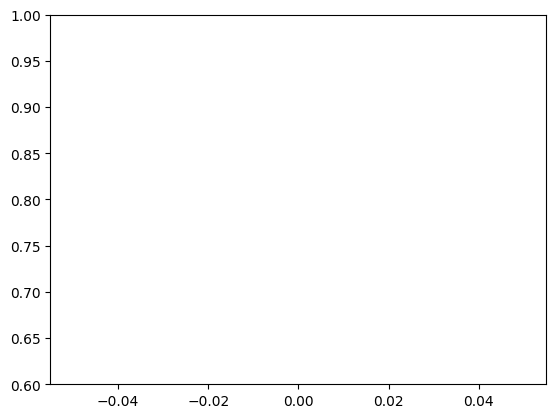

In [ ]:
plt.plot(model.cv_results_["mean_test_score"])
plt.ylim(0.6, 1.0)

In [ ]:
model.best_params_

{'clf__C': 1000,
 'clf__multi_class': 'ovr',
 'vect__max_df': 5,
 'vect__min_df': 1,
 'vect__ngram_range': (4, 4)}

In [ ]:
model.best_score_

0.6864546462488906

In [ ]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
model.predict(X_test)

array([0])

In [ ]:
le.inverse_transform(model.classes_)



array(['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test["cleaned_pr_bw"]), target_names=le.inverse_transform(model.classes_).tolist()))

              precision    recall  f1-score   support

           A       0.67      0.89      0.77        37
          AA       0.70      0.58      0.64        12
         AAA       1.00      0.83      0.91        18
           B       1.00      0.20      0.33        10
          BB       0.62      0.73      0.67        11
         BBB       0.74      0.70      0.72        20
           C       1.00      1.00      1.00         4

    accuracy                           0.74       112
   macro avg       0.82      0.71      0.72       112
weighted avg       0.78      0.74      0.73       112



In [ ]:
# сохраним модели
import pickle
path = "/content/drive/MyDrive/ML/"
with open(path + 'log_reg_4ngram_best_model.pkl','wb') as f:
    pickle.dump(vect_best,f)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf_mat = confusion_matrix(y_test, model.predict(X_test["cleaned_pr_bw"]))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat, display_labels=le.inverse_transform(model.classes_).tolist())

In [ ]:
data_test["Категория"].value_counts()

Категория
A      37
BBB    20
AAA    18
AA     12
BB     11
B      10
C       4
Name: count, dtype: int64

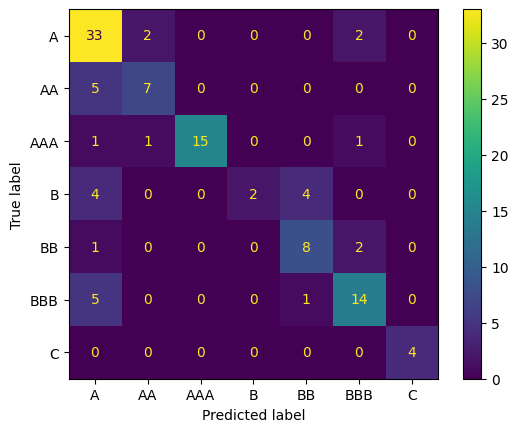

In [ ]:
disp.plot()

# Визуализируем топ н-грамм модели тональности в соответствии с весами присвоенными логистической регрессией с помощью библиотеки ELI5

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=97b83977f7630d4cef25afae5e7abe0abb6a8c6c8224df0309b8b52536e1993c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import pickle
path = "/content/drive/MyDrive/ML/"
with open(path + 'log_reg_3ngram_old.pkl','rb') as f:
     model_best = pickle.load(f)
with open(path + 'log_reg_3ngram_vect_old.pkl','rb') as f:
     vect_best = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# достаём лучшие модели после grid search
#import eli5
model_best = model.best_estimator_ # лучшая модель
vect_best = model_best.named_steps.vect # лучший tf-idf vectorizer
target_names = le.inverse_transform(model_best.classes_)

In [ ]:
four_grams = vect_best.transform(X_train["cleaned_pr_bw"])

In [ ]:
four_grams.shape

(986, 312198)

In [ ]:
# сохраним модели
import pickle
path = "/content/drive/MyDrive/ML/"
with open(path + 'log_reg_3ngram_old.pkl','wb') as f:
    pickle.dump(model_best,f)
with open(path + 'log_reg_3ngram_vect_old.pkl','wb') as f:
    pickle.dump(vect_best,f)

In [ ]:
target_names

array(['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'C'], dtype=object)

In [ ]:
clf = model_best.named_steps["clf"] # в ELI5 нужно передавать чистый классификатор без vectorizer

In [ ]:
eli5.show_weights(clf, vec=vect_best, top = 7,target_names=target_names)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
A_html = eli5.show_weights(clf, vec=vect_best, top = 5000,target_names=target_names, targets = ["AAA"])
c1 = pd.read_html(A_html.data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
A_html = eli5.show_weights(clf, vec=vect_best, top = 5000,target_names=target_names, targets = ["AA"])
c2 = pd.read_html(A_html.data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
A_html = eli5.show_weights(clf, vec=vect_best, top = 5000,target_names=target_names, targets = ["A"])
c3 = pd.read_html(A_html.data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
A_html = eli5.show_weights(clf, vec=vect_best, top = 5000,target_names=target_names, targets = ["B"])
c4 = pd.read_html(A_html.data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
A_html = eli5.show_weights(clf, vec=vect_best, top = 5000,target_names=target_names, targets = ["BB"])
c5 = pd.read_html(A_html.data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
A_html = eli5.show_weights(clf, vec=vect_best, top = 5000,target_names=target_names, targets = ["BBB"])
c6 = pd.read_html(A_html.data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
A_html = eli5.show_weights(clf, vec=vect_best, top = 5000,target_names=target_names, targets = ["C"])
c7 = pd.read_html(A_html.data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ngrams = pd.DataFrame({"AAA": c1["Feature"], "AA": c2["Feature"], "A" : c3["Feature"] , "B" : c4["Feature"], "BB": c5["Feature"], "BBB": c6["Feature"], "C": c7["Feature"]})

In [ ]:
ngrams.to_csv("ngram-table.csv", encoding='utf-8')

In [ ]:
X_test_full = data[data.index.isin(X_test.index)]


In [ ]:
pr = X_test_full.loc[28, ["pr_txt_cleaned", "sentences_splitted", "cleaned_pr_bw"]].to_frame().T

In [ ]:
pr

pr_txt_cleaned  \
28  «Эксперт РА» снял статус «под наблюдением» по ...   

                                   sentences_splitted  \
28  [снять статус наблюдение кредитный рейтинг дек...   

                                        cleaned_pr_bw  
28  снять статус наблюдение кредитный рейтинг дека...

In [ ]:
pred = model_best.predict(pr["cleaned_pr_bw"])
pred

array([5])

In [ ]:
pred_prob = model.predict_proba(pr["cleaned_pr_bw"])

In [ ]:
with np.printoptions(precision=3, suppress=True):
    print("Predicted probabilities: ", pred_prob[0])

Predicted probabilities:  [0.079 0.036 0.006 0.001 0.011 0.867 0.   ]


In [ ]:
print(pred_prob)

[[9.94518677e-01 1.15511577e-03 1.00555563e-03 3.53876747e-04
  9.84567729e-04 1.89621819e-03 8.59891474e-05]]


In [ ]:
le.inverse_transform(pred)[0]

'BBB'

In [ ]:
pr["pr_txt_cleaned_splitted"] = pr["pr_txt_cleaned"].apply(nltk.sent_tokenize)

In [ ]:
#len_pr = len(pr["pr_txt_cleaned_splitted"][52])
# найдём индексы предложений содержащие наиболее важные 4-граммы
report_len = 5
report = []
indices = []
for ngram in BBB["Feature"]:
  for i, sent in enumerate(pr["sentences_splitted"][28]):
    if (ngram in sent) and (i not in indices):
      report.append(pr["pr_txt_cleaned_splitted"][28][i])
      indices.append(i)
  if len(report) == report_len:
    break

In [ ]:
pr["pr_txt_cleaned"][52]

'«Эксперт РА» подтвердил кредитный рейтинг ООО «Проект-Град» на уровне <rating>   Москва, 9 декабря 2022 г.  Рейтинговое агентство «Эксперт РА» подтвердило  рейтинг кредитоспособности  нефинансовой компании   ООО «Проект-Град»   на уровне <rating>. Прогноз по рейтингу – стабильный. ") ООО «Проект-Град»  является 100% дочерней компанией ООО «А101». В рамках Группы «А101» (далее – «группа»)  компания «Проект-Град» выступает крупнейшим держателем земельных участков,  признаваемых инвестиционной недвижимостью по МСФО. В декабре 2020 года «Проект-Град»  выступил эмитентом дебютного выпуска биржевых облигаций группы. Компания входит  в периметр консолидации Группы «А101», доля активов «Проект-Град» и его  дочерних обществ в консолидированной отчетности группы составляет более 30%, кроме  того, на уровне материнской компании действует система единого казначейства,  позволяющая оптимизировать управление внутригрупповыми денежными потоками.  Учитывая эти факторы, агентство в соответствии с дейс

In [ ]:
print("\n".join(report))


ООО  «Новые технологии» (далее – компания) специализируется на разработке и  производстве погружного оборудования для добычи нефти, а также оказывает услуги  по аренде, сервисному обслуживанию и ремонту погружного и наземного  оборудования.
Статус  «под наблюдением» был ранее установлен в связи со сдвигом срока завершения  аудиторской проверки годовой бухгалтерской отчетности по стандартам РСБУ за  2021 год.
На момент актуализации кредитного рейтинга аудиторское заключение по  годовой бухгалтерской отчетности по стандартам РСБУ за 2021 год агентству  предоставлено не было.
Снятие  статуса «под наблюдением» обусловлено предоставлением аудиторского заключения  по годовой бухгалтерской отчетности по стандартам РСБУ за 2021 год.


In [ ]:
# вероятности классов, которые даёт модель
indx = np.random.randint(0, len(X_test))
sample = X_test.iloc[indx][0]
probs = model_best.predict_proba([sample])
probs

array([[0.98863316, 0.01136684]])

In [ ]:
# Посмотрим на случайные пресс релиз и проинтерпретируем работу модели
eli5.show_prediction(clf, sample, vec=vect_best, target_names=target_names)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Попробуем скомпилировать топ20 n-грамм сильно влияюшие на good/bad тональность рейтинга

In [ ]:
vect_best.transform(X_test["cleaned_pr_bw"])

<348x9154 sparse matrix of type '<class 'numpy.float64'>'
	with 35849 stored elements in Compressed Sparse Row format>

In [ ]:
model_best.classes_

array([0, 1])

In [ ]:
le.inverse_transform(model_best.classes_)

array(['bad', 'good'], dtype=object)

In [ ]:
X_test_bad = X_test.loc[y_test == 0 ,"cleaned_pr_bw"]
X_test_good = X_test.loc[y_test == 1 ,"cleaned_pr_bw"]
assert(len(X_test) == len(X_test_bad) + len(X_test_good))

In [ ]:
y_test_bad = np.ones(len(X_test_bad))

In [ ]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clf, random_state=1).fit(vect_best.transform(X_test_bad).toarray(), y_test_bad) # importances of features for generalization


In [ ]:
eli5.show_weights(perm, vec=vect_best, top = 50, target_names=target_names)

# Интерпретируем модель тональности с помощью LIME (Local Interpretable Model-agnostic Explanations) НЕ  ПОЗВОЛЯЕТ анализировать ничего кроме unigramm

In [ ]:
#from importlib import reload  # Python 3.4+
import sklearn
# reload(sklearn)
# sklearn.__version__

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn
from importlib import reload  # Python 3.4+
reload(sklearn)
sklearn.__version__

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Successfully uninstalled scikit-learn-1.4.1.post1
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


NameError: name 'sklean' is not defined

In [ ]:
!pip install lime

In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
# достаём лучшие модели после grid search
model_best = model.best_estimator_ # лучшая модель
vect_best = model_best.named_steps.vect # лучший tf-idf vectorizer
target_names = le.inverse_transform(model_best.classes_)

In [ ]:
import pickle
path = "/content/drive/MyDrive/ML/"
with open(path + 'log_reg_3ngram.pkl','wb') as f:
    pickle.dump(model_best,f)
with open(path + 'log_reg_3ngram_vect.pkl','wb') as f:
    pickle.dump(vect_best,f)

In [ ]:
# вероятности классов, которые даёт модель
indx = np.random.randint(0, len(X_test))
sample = X_test.iloc[indx][0]
probs = model_best.predict_proba([sample])
probs

array([[0.09425557, 0.90574443]])

In [ ]:
indx

181

In [ ]:
# применяем LIME
class_names = le.inverse_transform(model_best.classes_)
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(sample, model_best.predict_proba, num_features=6) # num-features определяет сложность local fitted surrogate model
# print('Explanation for class %s' % class_names[0])
# print('\n'.join(map(str, exp.as_list(label=0))))
# print()
# print('Explanation for class %s' % class_names[1])
# print('\n'.join(map(str, exp.as_list(label=1))))

In [ ]:
exp.as_list(label = 1)

[('компания', -0.14873071478491365),
 ('статус', 0.11557438161756234),
 ('наблюдение', 0.11086530607786071),
 ('установить', 0.08939788968215769),
 ('нефинансовый', 0.06571743069848915),
 ('месяц', -0.06489195192635765)]

In [ ]:
exp.show_in_notebook(text=True)